# GPU

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU(s) física(s),", len(logical_gpus), "GPU(s) lógica(s)")
        print("Funciona")
    except RuntimeError as e:
        print(e)
else:
    print("Error")

1 GPU(s) física(s), 1 GPU(s) lógica(s)
Funciona


# Imports

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import os 
import requests
from zipfile import ZipFile 
import shutil #para copiar las imagenes de FER2013 y CK a data
import pandas as pd #para crear dataframe
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split #dividir la data de train en train ,test y val
from collections import Counter #para contar la cantidad de labels de cada generador
from keras.preprocessing.image import ImageDataGenerator #para crear el generador e iterador por dataframe o directory(), además pre-processing
import numpy as np 
import matplotlib.pyplot as plt #Gráficar
from keras.preprocessing import image 
from keras.callbacks import ModelCheckpoint #para crear un punto de control y guardar cada acc en cada epochs que mejore
from datetime import datetime #para tensorboard
from tensorflow.keras.callbacks import TensorBoard #para tensorboard
from keras.applications import InceptionResNetV2 
from keras.models import Sequential, Model 
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D 
import PIL

from keras.applications import EfficientNetB0
from keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,GlobalAveragePooling2D, Input
from keras.models import Model
from keras.regularizers import L2
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical


In [3]:
import random, os
import numpy as np
#import tensorflow as tf

def set_seed(seed=42):
  np.random.seed(seed) 
  tf.random.set_seed(seed) 
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)

set_seed()

# Data augmentation

## 64 batch

In [4]:
img_shape = 48
BATCH_SIZE = 64

train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

train_datagen = ImageDataGenerator(
    rescale=1/255,                
    rotation_range=10,            
    zoom_range=0.2,               
    width_shift_range=0.1,        
    height_shift_range=0.1,           
    horizontal_flip=True,         
    fill_mode='nearest',          
    validation_split=0.2          
)

val_datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="training",              
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',            
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="validation",            
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                
    seed = 42,
    shuffle=False
)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
train_generator.batch_size

64

## 128 batch

In [42]:
img_shape = 48
BATCH_SIZE = 128

train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

train_datagen = ImageDataGenerator(
    rescale=1/255,                
    rotation_range=10,            
    zoom_range=0.2,               
    width_shift_range=0.1,        
    height_shift_range=0.1,           
    horizontal_flip=True,         
    fill_mode='nearest',          
    validation_split=0.2          
)

val_datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="training",              
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',            
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="validation",            
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                
    seed = 42,
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 32 batch

In [57]:
img_shape = 48
BATCH_SIZE = 32

train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

train_datagen = ImageDataGenerator(
    rescale=1/255,                
    rotation_range=10,            
    zoom_range=0.2,               
    width_shift_range=0.1,        
    height_shift_range=0.1,           
    horizontal_flip=True,         
    fill_mode='nearest',          
    validation_split=0.2          
)

val_datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="training",              
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',            
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                 
    seed = 42,
    subset="validation",            
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_shape, img_shape),       
    color_mode='rgb',             
    class_mode='categorical',     
    batch_size=BATCH_SIZE,                
    seed = 42,
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [61]:
batch_size = train_generator.batch_size
print(batch_size)

32


In [58]:
train_generator.next()

(array([[[[0.31606588, 0.31606588, 0.31606588],
          [0.308676  , 0.308676  , 0.308676  ],
          [0.29862297, 0.29862297, 0.29862297],
          ...,
          [0.3054736 , 0.3054736 , 0.3054736 ],
          [0.31066278, 0.31066278, 0.31066278],
          [0.35762444, 0.35762444, 0.35762444]],
 
         [[0.31690735, 0.31690735, 0.31690735],
          [0.30950975, 0.30950975, 0.30950975],
          [0.29211104, 0.29211104, 0.29211104],
          ...,
          [0.30029222, 0.30029222, 0.30029222],
          [0.31069297, 0.31069297, 0.31069297],
          [0.3645148 , 0.3645148 , 0.3645148 ]],
 
         [[0.32178512, 0.32178512, 0.32178512],
          [0.3113395 , 0.3113395 , 0.3113395 ],
          [0.290157  , 0.290157  , 0.290157  ],
          ...,
          [0.28705382, 0.28705382, 0.28705382],
          [0.30115208, 0.30115208, 0.30115208],
          [0.36696425, 0.36696425, 0.36696425]],
 
         ...,
 
         [[0.0461726 , 0.0461726 , 0.0461726 ],
          [0.08215

## Visualization classes

In [5]:
print("Cantidad de imágenes por clase en el conjunto de entrenamiento:")
for cls, idx in train_generator.class_indices.items():
    print(f"{cls}: {sum(train_generator.classes == idx)}")

print("\nCantidad de imágenes por clase en el conjunto de validación:")
for cls, idx in val_generator.class_indices.items():
    print(f"{cls}: {sum(val_generator.classes == idx)}")

print("\nCantidad de imágenes por clase en el conjunto de prueba:")
for cls, idx in test_generator.class_indices.items():
    print(f"{cls}: {sum(test_generator.classes == idx)}")

Cantidad de imágenes por clase en el conjunto de entrenamiento:
angry: 3196
disgust: 349
fear: 3278
happy: 5772
neutral: 3972
sad: 3864
surprise: 2537

Cantidad de imágenes por clase en el conjunto de validación:
angry: 799
disgust: 87
fear: 819
happy: 1443
neutral: 993
sad: 966
surprise: 634

Cantidad de imágenes por clase en el conjunto de prueba:
angry: 958
disgust: 111
fear: 1024
happy: 1774
neutral: 1233
sad: 1247
surprise: 831


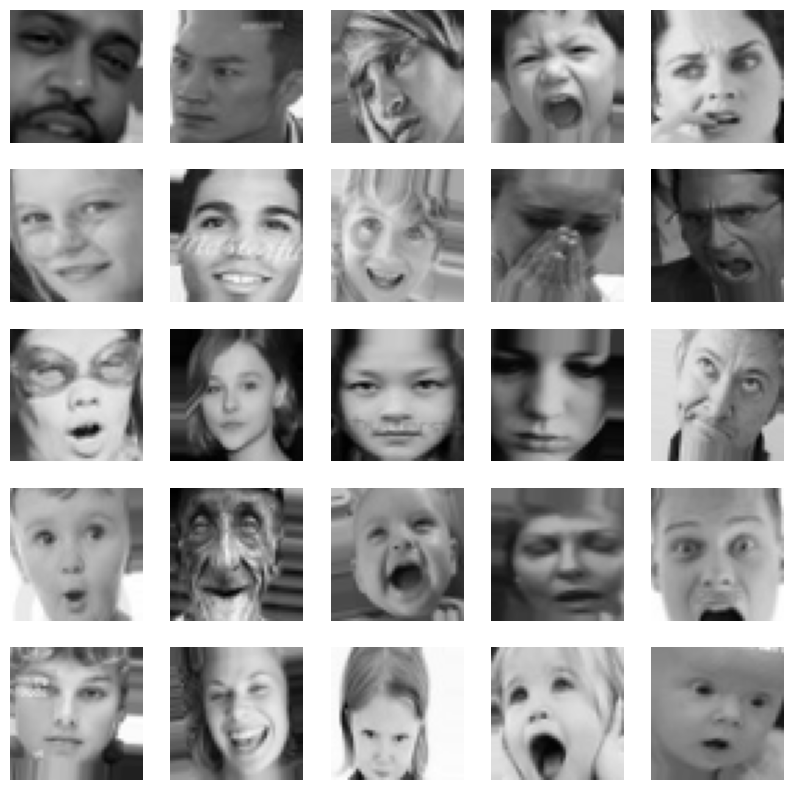

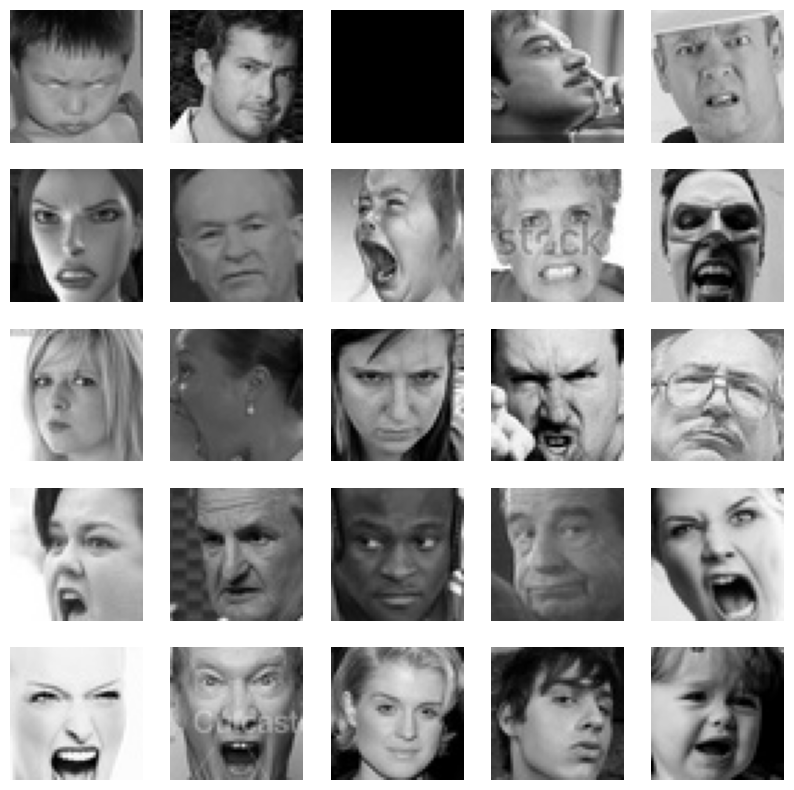

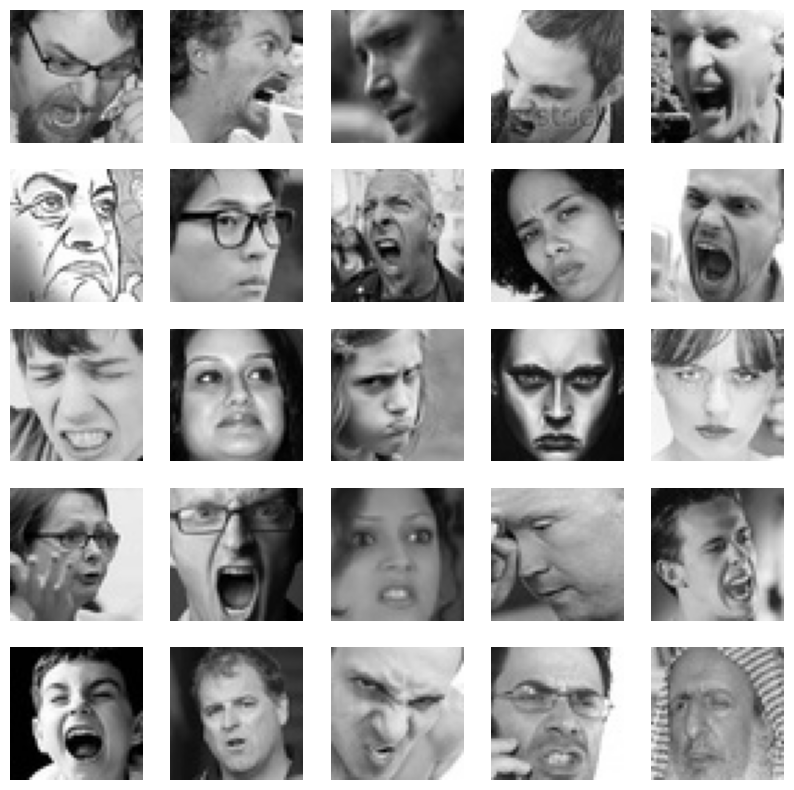

In [7]:
# Función para mostrar imágenes
def mostrar_imagenes(generator, num_images):
    images, labels = next(generator)
    
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])  
        plt.axis('off')
    
    plt.show()

mostrar_imagenes(train_generator, 25)
mostrar_imagenes(val_generator, 25)
mostrar_imagenes(test_generator, 25)

# Definition of importance by classes (balancing) in the models

In [6]:

classes = np.array(train_generator.classes)


class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(classes),  
    y=classes  
)

class_weights_dict = dict(enumerate(class_weights))

print("Class Weights Dictionary:", class_weights_dict)

Class Weights Dictionary: {0: 1.0266404434114071, 1: 9.401555464592715, 2: 1.0009587727708533, 3: 0.5684585684585685, 4: 0.826068191627104, 5: 0.8491570541259982, 6: 1.2933160650937552}


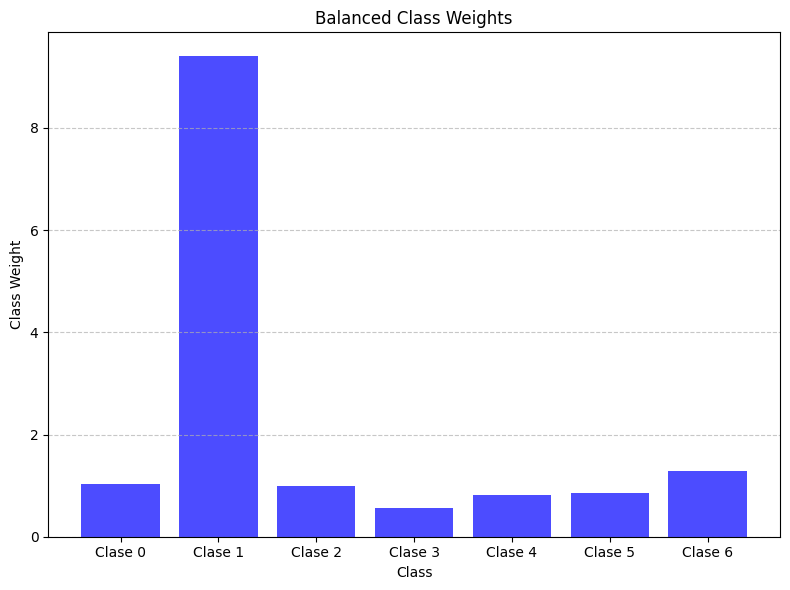

In [7]:

plt.figure(figsize=(8, 6))
plt.bar(class_weights_dict.keys(), class_weights_dict.values(), color='b', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Class Weight')
plt.title('Balanced Class Weights')
plt.xticks(list(class_weights_dict.keys()), labels=[f'Clase {k}' for k in class_weights_dict.keys()])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Models

## Model 1 Ensamble 68.15%

In [7]:
model_1 = tf.keras.models.load_model('models/test6_MoreData/64batch/best_model_ModelPaper2_158_0.6468.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)


model_3 = tf.keras.models.load_model('models/test3_MoreData/64batch/best_model_ModelPaper2_37_0.6438.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [11]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model1 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model1.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 7)            32117319    ['input_3[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 7)            3842119     ['input_3[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 7)            20191559    ['input_3[0][0]']                
                                                                                            

In [12]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model1/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model1/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model1/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model1/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [14]:
historyensemble_model1 = ensemble_model1.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.6058 - accuracy: 0.3654
Epoch 1: val_accuracy improved from -inf to 0.40167, saving model to models/ModelEnsamble/model1/64batch\best_model_ModelPaper1_1_0.4017.h5
359/359 [==============================] - 138s 331ms/step - loss: 2.6058 - accuracy: 0.3654 - val_loss: 2.5540 - val_accuracy: 0.4017 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.5771 - accuracy: 0.3829
Epoch 2: val_accuracy improved from 0.40167 to 0.41596, saving model to models/ModelEnsamble/model1/64batch\best_model_ModelPaper1_2_0.4160.h5
359/359 [==============================] - 77s 212ms/step - loss: 2.5771 - accuracy: 0.3829 - val_loss: 2.5281 - val_accuracy: 0.4160 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.5497 - accuracy: 0.4016
Epoch 3: val_accuracy improved from 0.41596 to 0.43337, saving model to models/ModelEnsamble/model1/64batch\best_model_Mode

In [16]:
ensemble_model1.evaluate(test_generator)

113/113 [==============================] - 17s 150ms/step - loss: 1.5976 - accuracy: 0.6815


[1.5976113080978394, 0.6815268993377686]

In [51]:
ensamble_model1_best = tf.keras.models.load_model(r'models\ModelEnsamble\model1\64batch\best_model_ModelPaper1_132_0.6687.h5')
evalbest1 = ensamble_model1_best.evaluate(test_generator)
print(evalbest1)

113/113 [==============================] - 7s 58ms/step - loss: 1.5977 - accuracy: 0.6815
[1.5976828336715698, 0.6815268993377686]


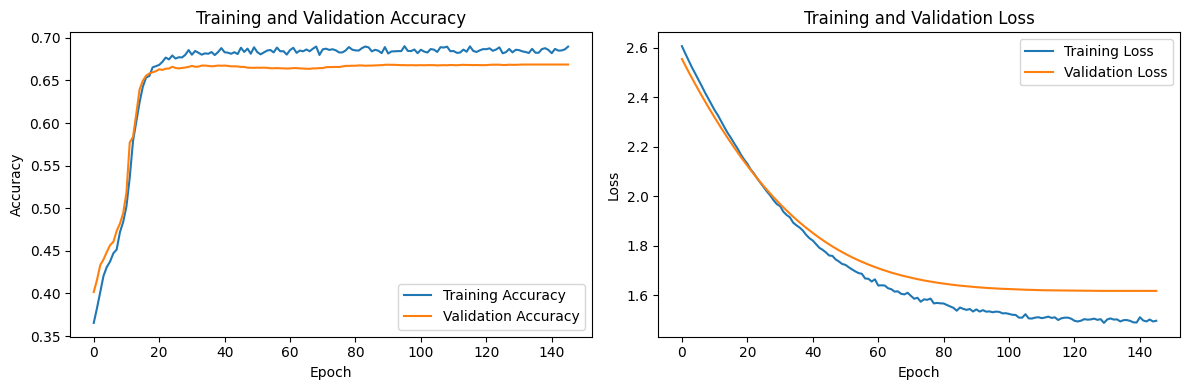

In [15]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model1.history['accuracy']
loss = historyensemble_model1.history['loss']
val_accuracy = historyensemble_model1.history['val_accuracy']
val_loss = historyensemble_model1.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 2 Ensamble 68.06%

In [17]:
model_1 = tf.keras.models.load_model('models/test6_MoreData/64batch/best_model_ModelPaper2_158_0.6468.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)


model_3 = tf.keras.models.load_model('models/test3_MoreData/64batch/best_model_ModelPaper2_37_0.6438.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [18]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dense_out = Dense(128, activation="relu")(ensemble_output)
dropout_layer = Dropout(0.5)(dense_out)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model2 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model2.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model2.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_6 (Functional)           (None, 7)            32117319    ['input_4[0][0]']                
                                                                                                  
 model_7 (Functional)           (None, 7)            3842119     ['input_4[0][0]']                
                                                                                                  
 model_8 (Functional)           (None, 7)            20191559    ['input_4[0][0]']                
                                                                                            

In [19]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble2/model1/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble2/model1/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble2/model1/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble2/model1/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [21]:
historyensemble_model2 = ensemble_model2.fit(
    x = train_generator,
    epochs = 100,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/100
359/359 [==============================] - ETA: 0s - loss: 2.4802 - accuracy: 0.5644
Epoch 1: val_accuracy improved from -inf to 0.66469, saving model to models/ModelEnsamble2/model1/64batch\best_model_ModelPaper1_1_0.6647.h5
359/359 [==============================] - 59s 148ms/step - loss: 2.4802 - accuracy: 0.5644 - val_loss: 2.3102 - val_accuracy: 0.6647 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 2.1261 - accuracy: 0.7294
Epoch 2: val_accuracy improved from 0.66469 to 0.66504, saving model to models/ModelEnsamble2/model1/64batch\best_model_ModelPaper1_2_0.6650.h5
359/359 [==============================] - 64s 179ms/step - loss: 2.1261 - accuracy: 0.7294 - val_loss: 1.9784 - val_accuracy: 0.6650 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 1.7946 - accuracy: 0.7353
Epoch 3: val_accuracy improved from 0.66504 to 0.66713, saving model to models/ModelEnsamble2/model1/64batch\best_model_Mo

In [52]:
ensamble_model2_best = tf.keras.models.load_model(r'models\ModelEnsamble2\model1\64batch\best_model_ModelPaper1_16_0.6696.h5')
evalbest2 = ensamble_model2_best.evaluate(test_generator)
print(evalbest2)

113/113 [==============================] - 7s 58ms/step - loss: 1.6092 - accuracy: 0.6807
[1.6092177629470825, 0.6806910037994385]


## Model 3 Ensamble 68.02%

In [28]:
model_1 = tf.keras.models.load_model('models/test6_MoreData/64batch/best_model_ModelPaper2_158_0.6468.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [29]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model3 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model3.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model3.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_10 (Functional)          (None, 7)            32117319    ['input_5[0][0]']                
                                                                                                  
 model_11 (Functional)          (None, 7)            3842119     ['input_5[0][0]']                
                                                                                                  
 model_12 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                           

In [30]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model3/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model3/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model3/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model3/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [32]:
historyensemble_model3 = ensemble_model3.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7190 - accuracy: 0.1157
Epoch 1: val_accuracy improved from -inf to 0.14597, saving model to models/ModelEnsamble/model3/64batch\best_model_ModelPaper1_1_0.1460.h5
359/359 [==============================] - 281s 731ms/step - loss: 2.7190 - accuracy: 0.1157 - val_loss: 2.7268 - val_accuracy: 0.1460 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.6920 - accuracy: 0.1718
Epoch 2: val_accuracy improved from 0.14597 to 0.18394, saving model to models/ModelEnsamble/model3/64batch\best_model_ModelPaper1_2_0.1839.h5
359/359 [==============================] - 119s 298ms/step - loss: 2.6920 - accuracy: 0.1718 - val_loss: 2.6975 - val_accuracy: 0.1839 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.6619 - accuracy: 0.2027
Epoch 3: val_accuracy improved from 0.18394 to 0.20850, saving model to models/ModelEnsamble/model3/64batch\best_model_Mod

In [33]:
ensemble_model3.evaluate(test_generator)

113/113 [==============================] - 27s 234ms/step - loss: 1.6832 - accuracy: 0.6804


[1.683150053024292, 0.6804123520851135]

In [50]:
ensamble_model3_best = tf.keras.models.load_model(r'models\ModelEnsamble\model3\64batch\best_model_ModelPaper1_116_0.6673.h5')
evalbest3 = ensamble_model3_best.evaluate(test_generator)
print(evalbest3)

113/113 [==============================] - 6s 46ms/step - loss: 1.6852 - accuracy: 0.6803
[1.6851539611816406, 0.6802730560302734]


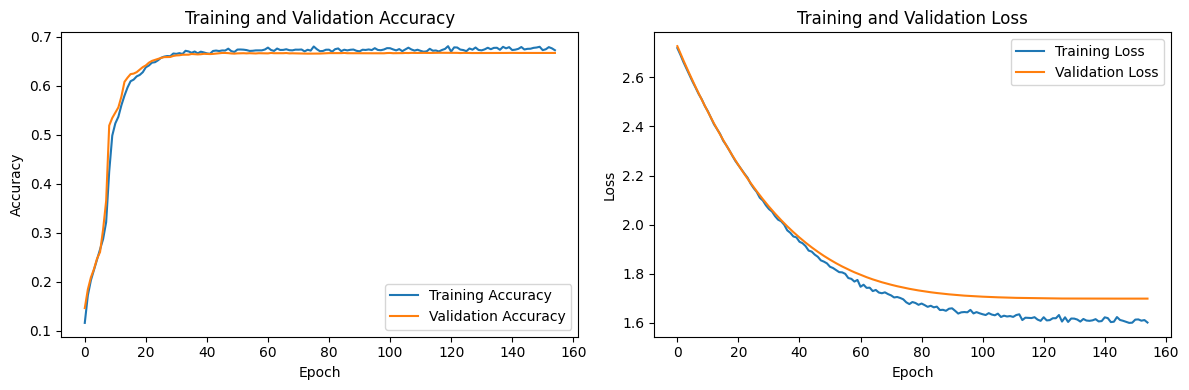

In [34]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model3.history['accuracy']
loss = historyensemble_model3.history['loss']
val_accuracy = historyensemble_model3.history['val_accuracy']
val_loss = historyensemble_model3.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 4 ensamble 69%

### 64 batch

In [44]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [45]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model4 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model4.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model4.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_14 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                                  
 model_15 (Functional)          (None, 7)            3842119     ['input_5[0][0]']                
                                                                                                  
 model_16 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                           

In [46]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model4/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model4/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model4/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model4/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [39]:
historyensemble_model4 = ensemble_model4.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7334 - accuracy: 0.1291
Epoch 1: val_accuracy improved from -inf to 0.13134, saving model to models/ModelEnsamble/model4/64batch\best_model_ModelPaper1_1_0.1313.h5
359/359 [==============================] - 52s 128ms/step - loss: 2.7334 - accuracy: 0.1291 - val_loss: 2.7865 - val_accuracy: 0.1313 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.7044 - accuracy: 0.1447
Epoch 2: val_accuracy improved from 0.13134 to 0.13987, saving model to models/ModelEnsamble/model4/64batch\best_model_ModelPaper1_2_0.1399.h5
359/359 [==============================] - 44s 124ms/step - loss: 2.7044 - accuracy: 0.1447 - val_loss: 2.7548 - val_accuracy: 0.1399 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.6761 - accuracy: 0.1572
Epoch 3: val_accuracy improved from 0.13987 to 0.14910, saving model to models/ModelEnsamble/model4/64batch\best_model_Model

In [40]:
ensemble_model4.evaluate(test_generator)

113/113 [==============================] - 7s 58ms/step - loss: 1.7389 - accuracy: 0.6835


[1.738943099975586, 0.6834772825241089]

In [7]:
ensamble_model4_best = tf.keras.models.load_model(r'models/ModelEnsamble/model4/64batch\best_model_ModelPaper1_40_0.6748.h5')
evalbest4 = ensamble_model4_best.evaluate(test_generator)
evalbesttrain4 = ensamble_model4_best.evaluate(train_generator)
print("Evaluación test: ",evalbest4)
print("Evaluación train: ",evalbesttrain4)

359/359 [==============================] - 50s 139ms/step - loss: 1.9356 - accuracy: 0.7483
Evaluación test:  [1.990120530128479, 0.6858456134796143]
Evaluación train:  [1.9355549812316895, 0.7482584714889526]


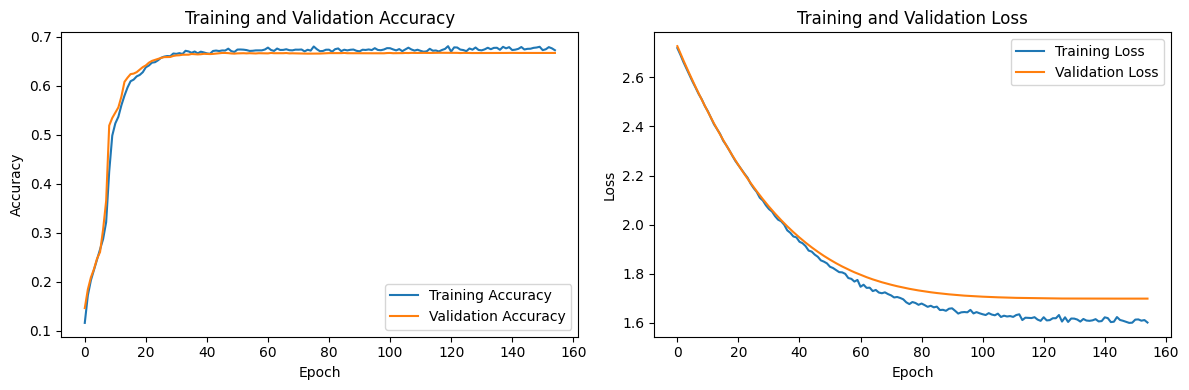

In [41]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model3.history['accuracy']
loss = historyensemble_model3.history['loss']
val_accuracy = historyensemble_model3.history['val_accuracy']
val_loss = historyensemble_model3.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensamble_model4_best.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 5s 44ms/step
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       958
           1       0.70      0.66      0.68       111
           2       0.60      0.40      0.48      1024
           3       0.89      0.86      0.88      1774
           4       0.60      0.73      0.66      1233
           5       0.58      0.54      0.56      1247
           6       0.76      0.85      0.80       831

    accuracy                           0.69      7178
   macro avg       0.67      0.67      0.67      7178
weighted avg       0.69      0.69      0.68      7178

<function confusion_matrix at 0x000001BA8BC7C550>


Text(95.72222222222221, 0.5, 'True labels')

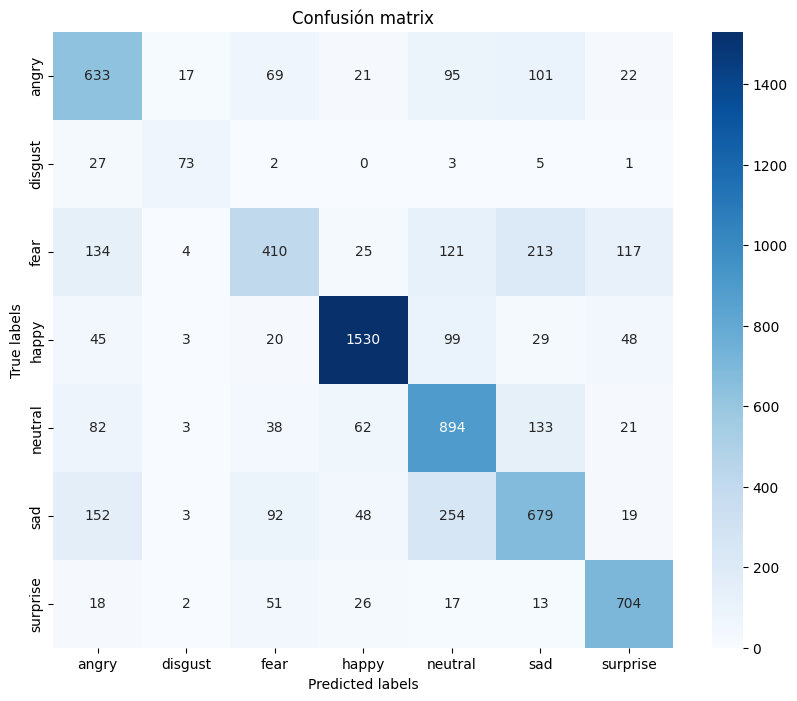

In [9]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### 128 batch

In [47]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [48]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model4_1 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model4_1.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model4_1.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_18 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                                  
 model_19 (Functional)          (None, 7)            3842119     ['input_6[0][0]']                
                                                                                                  
 model_20 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                           

In [49]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model4_128batch/128batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model4_128batch/128batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model4_128batch/128batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model4_128batch/128batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [50]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [51]:
historyensemble_model4_1 = ensemble_model4_1.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
180/180 [==============================] - ETA: 0s - loss: 2.7553 - accuracy: 0.2915
Epoch 1: val_accuracy improved from -inf to 0.30657, saving model to models/ModelEnsamble/model4_128batch/128batch\best_model_ModelPaper1_1_0.3066.h5
180/180 [==============================] - 49s 254ms/step - loss: 2.7553 - accuracy: 0.2915 - val_loss: 2.7435 - val_accuracy: 0.3066 - lr: 1.0000e-04
Epoch 2/300
180/180 [==============================] - ETA: 0s - loss: 2.7385 - accuracy: 0.3261
Epoch 2: val_accuracy improved from 0.30657 to 0.32782, saving model to models/ModelEnsamble/model4_128batch/128batch\best_model_ModelPaper1_2_0.3278.h5
180/180 [==============================] - 43s 240ms/step - loss: 2.7385 - accuracy: 0.3261 - val_loss: 2.7291 - val_accuracy: 0.3278 - lr: 1.0000e-04
Epoch 3/300
180/180 [==============================] - ETA: 0s - loss: 2.7237 - accuracy: 0.3425
Epoch 3: val_accuracy improved from 0.32782 to 0.34384, saving model to models/ModelEnsamble/model4_128b

In [54]:
ensemble_model4_1_up = tf.keras.models.load_model(r'C:\Users\bryan\OneDrive\Escritorio\Tesis\Codigo tesis\Imagen\Code 2\code3\models\ModelEnsamble\model4_128batch\128batch\best_model_ModelPaper1_186_0.6734.h5')
print(ensemble_model4_1_up.evaluate(test_generator))

57/57 [==============================] - 6s 91ms/step - loss: 1.7434 - accuracy: 0.6836
[1.7434253692626953, 0.683616578578949]


In [52]:
ensemble_model4_1.evaluate(test_generator)

57/57 [==============================] - 13s 227ms/step - loss: 1.7393 - accuracy: 0.6838


[1.7393321990966797, 0.6837559342384338]

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model4_1_up.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

57/57 [==============================] - 6s 93ms/step
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       958
           1       0.67      0.68      0.67       111
           2       0.58      0.44      0.50      1024
           3       0.91      0.85      0.88      1774
           4       0.59      0.75      0.66      1233
           5       0.61      0.50      0.55      1247
           6       0.76      0.84      0.80       831

    accuracy                           0.68      7178
   macro avg       0.67      0.67      0.67      7178
weighted avg       0.69      0.68      0.68      7178

<function confusion_matrix at 0x000002238BDE4550>


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensamble_model4_best.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

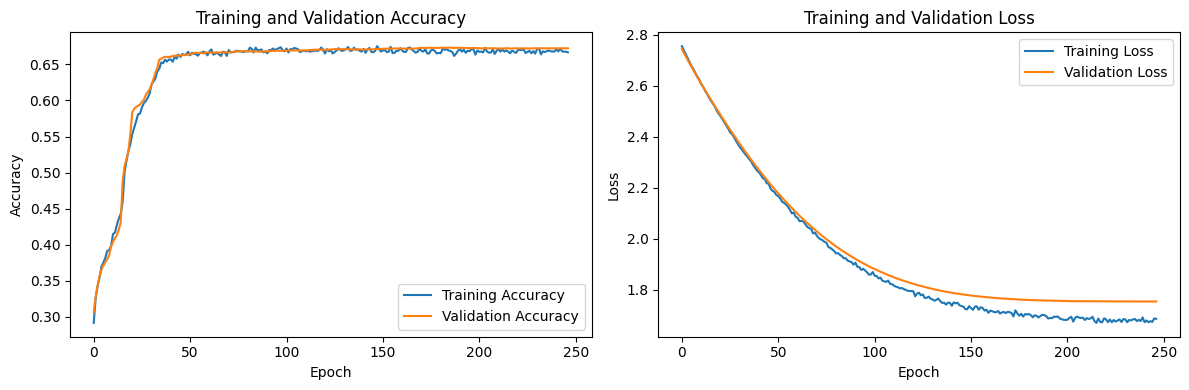

In [53]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model4_1.history['accuracy']
loss = historyensemble_model4_1.history['loss']
val_accuracy = historyensemble_model4_1.history['val_accuracy']
val_loss = historyensemble_model4_1.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 32 Batch

In [63]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [64]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model4_2 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model4_2.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model4_2.summary()

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_25 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                                  
 model_26 (Functional)          (None, 7)            3842119     ['input_7[0][0]']                
                                                                                                  
 model_27 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                           

In [65]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model4_32batch/32batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model4_32batch/32batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model4_32batch/32batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model4_32batch/32batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [66]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [67]:
train_generator.batch_size

32

In [68]:
historyensemble_model4_2 = ensemble_model4_2.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
718/718 [==============================] - ETA: 0s - loss: 2.6513 - accuracy: 0.3658
Epoch 1: val_accuracy improved from -inf to 0.42554, saving model to models/ModelEnsamble/model4_32batch/32batch\best_model_ModelPaper1_1_0.4255.h5
718/718 [==============================] - 54s 71ms/step - loss: 2.6513 - accuracy: 0.3658 - val_loss: 2.6132 - val_accuracy: 0.4255 - lr: 1.0000e-04
Epoch 2/300
718/718 [==============================] - ETA: 0s - loss: 2.6050 - accuracy: 0.4182
Epoch 2: val_accuracy improved from 0.42554 to 0.44609, saving model to models/ModelEnsamble/model4_32batch/32batch\best_model_ModelPaper1_2_0.4461.h5
718/718 [==============================] - 48s 67ms/step - loss: 2.6050 - accuracy: 0.4182 - val_loss: 2.5668 - val_accuracy: 0.4461 - lr: 1.0000e-04
Epoch 3/300
718/718 [==============================] - ETA: 0s - loss: 2.5624 - accuracy: 0.4676
Epoch 3: val_accuracy improved from 0.44609 to 0.53005, saving model to models/ModelEnsamble/model4_32batch/32

In [69]:
ensemble_model4_2.evaluate(test_generator)

225/225 [==============================] - 7s 29ms/step - loss: 1.7377 - accuracy: 0.6831


[1.7376785278320312, 0.6830593347549438]

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model4_2.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

225/225 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       958
           1       0.67      0.67      0.67       111
           2       0.57      0.44      0.50      1024
           3       0.90      0.85      0.88      1774
           4       0.59      0.74      0.66      1233
           5       0.61      0.50      0.55      1247
           6       0.76      0.84      0.80       831

    accuracy                           0.68      7178
   macro avg       0.67      0.67      0.67      7178
weighted avg       0.69      0.68      0.68      7178

<function confusion_matrix at 0x000002238BDE4550>


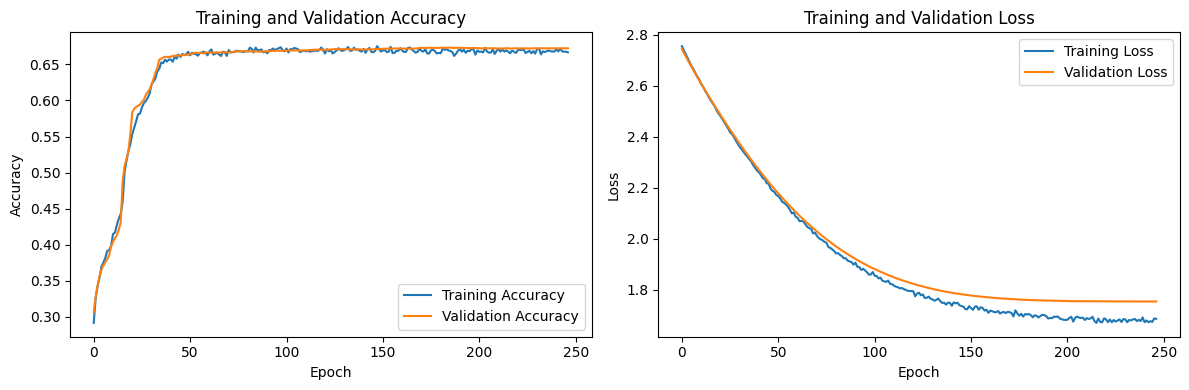

In [70]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model4_1.history['accuracy']
loss = historyensemble_model4_1.history['loss']
val_accuracy = historyensemble_model4_1.history['val_accuracy']
val_loss = historyensemble_model4_1.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 5 ensamble 67.65%

In [42]:
model_1 = tf.keras.models.load_model('models/test6_MoreData/64batch/best_model_ModelPaper2_158_0.6468.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [43]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.3)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model5 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model5.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model5.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_18 (Functional)          (None, 7)            32117319    ['input_7[0][0]']                
                                                                                                  
 model_19 (Functional)          (None, 7)            3842119     ['input_7[0][0]']                
                                                                                                  
 model_20 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                           

In [44]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model5/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model5/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model5/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model5/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [45]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [46]:
historyensemble_model5 = ensemble_model5.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7651 - accuracy: 0.0946
Epoch 1: val_accuracy improved from -inf to 0.08831, saving model to models/ModelEnsamble/model5/64batch\best_model_ModelPaper1_1_0.0883.h5
359/359 [==============================] - 77s 158ms/step - loss: 2.7651 - accuracy: 0.0946 - val_loss: 2.7637 - val_accuracy: 0.0883 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.7390 - accuracy: 0.0987
Epoch 2: val_accuracy improved from 0.08831 to 0.09720, saving model to models/ModelEnsamble/model5/64batch\best_model_ModelPaper1_2_0.0972.h5
359/359 [==============================] - 61s 169ms/step - loss: 2.7390 - accuracy: 0.0987 - val_loss: 2.7358 - val_accuracy: 0.0972 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.7118 - accuracy: 0.1038
Epoch 3: val_accuracy improved from 0.09720 to 0.10225, saving model to models/ModelEnsamble/model5/64batch\best_model_Model

In [47]:
ensemble_model5.evaluate(test_generator)

113/113 [==============================] - 11s 91ms/step - loss: 1.7012 - accuracy: 0.6804


[1.701151728630066, 0.6804123520851135]

In [53]:
ensamble_model5_best = tf.keras.models.load_model(r'models\ModelEnsamble\model5\64batch\best_model_ModelPaper1_67_0.6685.h5')
evalbest5 = ensamble_model5_best.evaluate(test_generator)
print(evalbest5)

113/113 [==============================] - 6s 47ms/step - loss: 1.8045 - accuracy: 0.6765
[1.804487943649292, 0.6765115857124329]


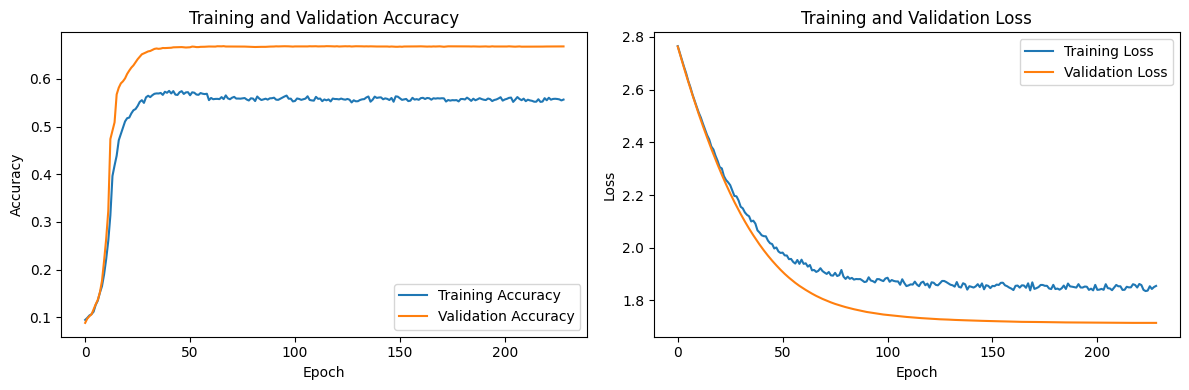

In [48]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model5.history['accuracy']
loss = historyensemble_model5.history['loss']
val_accuracy = historyensemble_model5.history['val_accuracy']
val_loss = historyensemble_model5.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 6 68.25%

In [17]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models/test6_MoreData/64batch\best_model_ModelPaper2_158_0.6468.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

In [23]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model5 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model5.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model5.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_6 (Functional)           (None, 7)            5183431     ['input_4[0][0]']                
                                                                                                  
 model_7 (Functional)           (None, 7)            3842119     ['input_4[0][0]']                
                                                                                                  
 model_8 (Functional)           (None, 7)            5183431     ['input_4[0][0]']                
                                                                                           

In [24]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model6_new/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model6_new/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model6_new/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model6_new/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [26]:
historyensemble_model5 = ensemble_model5.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.9908 - accuracy: 0.2435
Epoch 1: val_accuracy improved from -inf to 0.24752, saving model to models/ModelEnsamble/model6_new/64batch\best_model_ModelPaper1_1_0.2475.h5
359/359 [==============================] - 52s 139ms/step - loss: 2.9908 - accuracy: 0.2435 - val_loss: 2.9793 - val_accuracy: 0.2475 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.9625 - accuracy: 0.2502
Epoch 2: val_accuracy improved from 0.24752 to 0.25797, saving model to models/ModelEnsamble/model6_new/64batch\best_model_ModelPaper1_2_0.2580.h5
359/359 [==============================] - 48s 132ms/step - loss: 2.9625 - accuracy: 0.2502 - val_loss: 2.9495 - val_accuracy: 0.2580 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.9333 - accuracy: 0.2675
Epoch 3: val_accuracy improved from 0.25797 to 0.26685, saving model to models/ModelEnsamble/model6_new/64batch\best

113/113 [==============================] - 26s 232ms/step - loss: 1.9579 - accuracy: 0.6825
[1.9579455852508545, 0.6825020909309387]


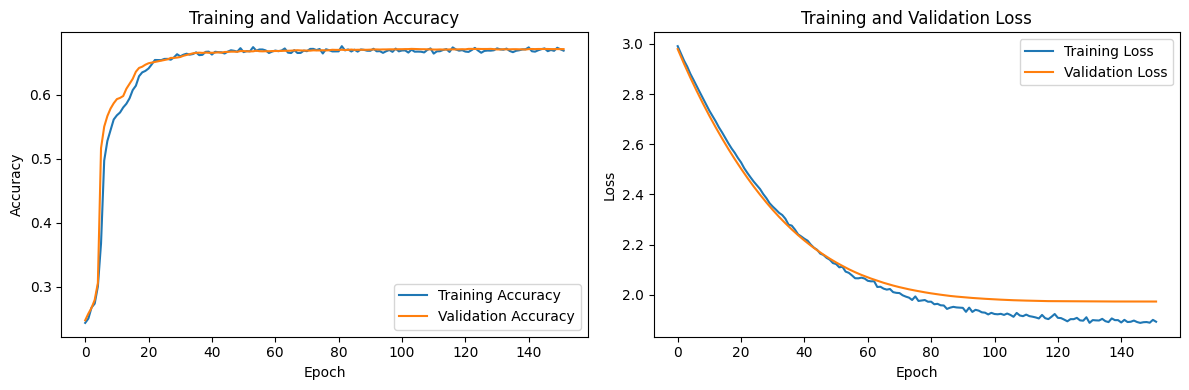

In [27]:
import matplotlib.pyplot as plt

print(ensemble_model5.evaluate(test_generator))

accuracy = historyensemble_model5.history['accuracy']
loss = historyensemble_model5.history['loss']
val_accuracy = historyensemble_model5.history['val_accuracy']
val_loss = historyensemble_model5.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 7 67.97%

In [28]:
#model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

#model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models/test6_MoreData/64batch\best_model_ModelPaper2_158_0.6468.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

In [29]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_2, model_3, model_4] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model7 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model7.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model7.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_12 (Functional)          (None, 7)            3842119     ['input_5[0][0]']                
                                                                                                  
 model_13 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                                  
 model_14 (Functional)          (None, 7)            32117319    ['input_5[0][0]']                
                                                                                           

In [30]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model7_new/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model7_new/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model7_new/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model7_new/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [32]:
historyensemble_model7 = ensemble_model7.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7328 - accuracy: 0.2379
Epoch 1: val_accuracy improved from -inf to 0.25449, saving model to models/ModelEnsamble/model7_new/64batch\best_model_ModelPaper1_1_0.2545.h5
359/359 [==============================] - 49s 130ms/step - loss: 2.7328 - accuracy: 0.2379 - val_loss: 2.6388 - val_accuracy: 0.2545 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.7058 - accuracy: 0.2524
Epoch 2: val_accuracy improved from 0.25449 to 0.26267, saving model to models/ModelEnsamble/model7_new/64batch\best_model_ModelPaper1_2_0.2627.h5
359/359 [==============================] - 47s 129ms/step - loss: 2.7058 - accuracy: 0.2524 - val_loss: 2.6135 - val_accuracy: 0.2627 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.6775 - accuracy: 0.2543
Epoch 3: val_accuracy did not improve from 0.26267
359/359 [==============================] - 46s 126ms/step - loss:

113/113 [==============================] - 13s 117ms/step - loss: 1.6834 - accuracy: 0.6797
[1.683442234992981, 0.6797158122062683]


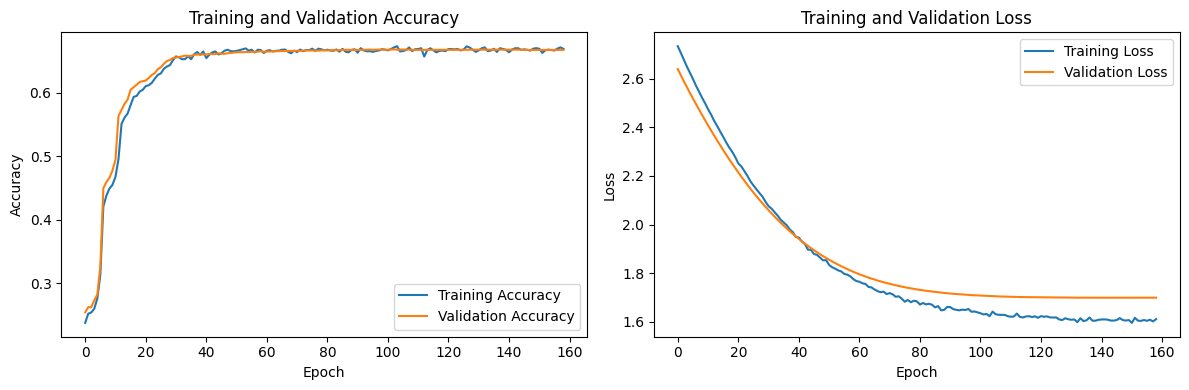

In [33]:
import matplotlib.pyplot as plt

print(ensemble_model7.evaluate(test_generator))

accuracy = historyensemble_model7.history['accuracy']
loss = historyensemble_model7.history['loss']
val_accuracy = historyensemble_model7.history['val_accuracy']
val_loss = historyensemble_model7.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 8 Ensamble Transfer learning 63.72%

In [78]:
from tensorflow.keras.applications import VGG19, ResNet50V2



model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')
base_model_1 = Model(inputs = model_3.inputs, outputs=model_3.output)

base_model_2 = VGG19(weights='imagenet', include_top=False, input_shape=(48,48,3))
base_model_3 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(48,48,3))

for layer in base_model_1.layers:
    layer.trainable = False
for layer in base_model_2.layers:
    layer.trainable = False
for layer in base_model_3.layers:
    layer.trainable = False

def add_custom_layers(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(7, activation="softmax")(x)
    return Model(inputs=base_model.input, outputs=x)

model_2 = add_custom_layers(base_model_2)
model_3 = add_custom_layers(base_model_3)

models = [base_model_1, model_2, model_3]

model_input = Input(shape=(48,48,3))
model_outputs = [model(model_input) for model in models]

ensemble_output = Average()(model_outputs)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)


ensemble_model_8 = Model(inputs=model_input, outputs=dense_layer)

ensemble_model_8.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model_8.summary()


Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_39 (Functional)          (None, 7)            5183431     ['input_20[0][0]']               
                                                                                                  
 model_40 (Functional)          (None, 7)            20556871    ['input_20[0][0]']               
                                                                                                  
 model_41 (Functional)          (None, 7)            25670151    ['input_20[0][0]']               
                                                                                           

In [79]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model8/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model8/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model8/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model8/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [82]:
train_generator.batch_size

64

In [83]:
historyensemble_model8 = ensemble_model_8.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.1915 - accuracy: 0.0894
Epoch 1: val_accuracy improved from -inf to 0.08744, saving model to models/ModelEnsamble/model8/64batch\best_model_ModelPaper1_1_0.0874.h5
359/359 [==============================] - 82s 202ms/step - loss: 2.1915 - accuracy: 0.0894 - val_loss: 2.1847 - val_accuracy: 0.0874 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.1662 - accuracy: 0.1142
Epoch 2: val_accuracy improved from 0.08744 to 0.13186, saving model to models/ModelEnsamble/model8/64batch\best_model_ModelPaper1_2_0.1319.h5
359/359 [==============================] - 52s 144ms/step - loss: 2.1662 - accuracy: 0.1142 - val_loss: 2.1624 - val_accuracy: 0.1319 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.1545 - accuracy: 0.1237
Epoch 3: val_accuracy improved from 0.13186 to 0.14858, saving model to models/ModelEnsamble/model8/64batch\best_model_Model

In [85]:
ensemble_model_8.evaluate(test_generator)

113/113 [==============================] - 12s 101ms/step - loss: 1.3049 - accuracy: 0.6372


[1.3049207925796509, 0.6372248530387878]

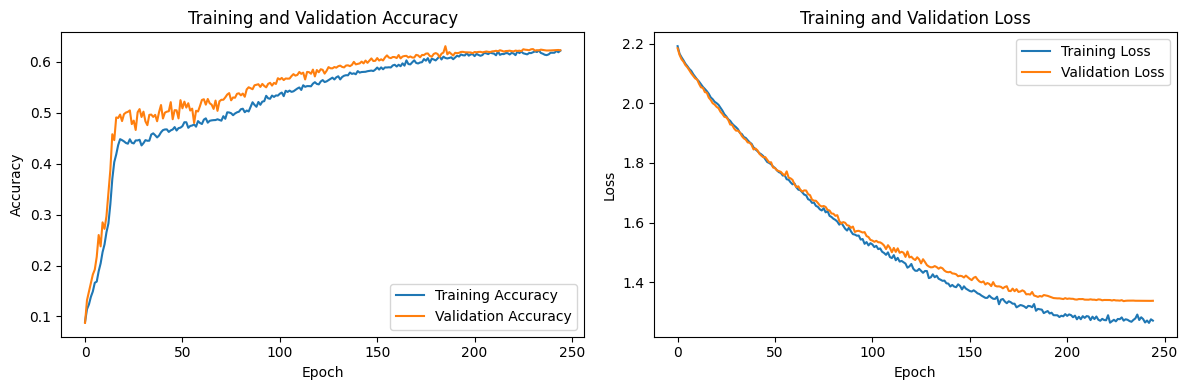

In [84]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model8.history['accuracy']
loss = historyensemble_model8.history['loss']
val_accuracy = historyensemble_model8.history['val_accuracy']
val_loss = historyensemble_model8.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 9 68.08%

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')
model_1 = Model(inputs=model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')
model_2 = Model(inputs=model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')
model_3 = Model(inputs=model_3.inputs, outputs=model_3.output)

for layer in model_1.layers:
    layer.trainable = False
for layer in model_2.layers:
    layer.trainable = False
for layer in model_3.layers:
    layer.trainable = False

In [9]:
# Clase para calcular la combinación ponderada de dos modelos
class WeightedAverageLayer(tf.keras.layers.Layer): #Pesos ponderados
    def __init__(self, w1, w2, w3, **kwargs): #Ingresa cada modelo
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1] + self.w3 * inputs[2] #Se multiplica el modelo por el valor ponderado ingresado

    def get_config(self):
        config = super(WeightedAverageLayer, self).get_config()
        config.update({
            'w1': self.w1,
            'w2': self.w2,
            'w3': self.w3
        })
        return config

In [10]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Lambda, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19, ResNet50V2
from tensorflow.keras.optimizers import Adam


models = [model_1, model_2, model_3]

# Ensamble de votación mayoritaria
model_input = Input(shape=(48, 48, 3))
model_outputs = [model(model_input) for model in models]

ensemble_output  = WeightedAverageLayer(0.1, 0.3,0.6)(model_outputs)

dropout_layer = Dropout(0.1)(ensemble_output)

dense_layer = Dense(7, activation="softmax")(dropout_layer)

ensemble_model_voting = Model(inputs=model_input, outputs=dense_layer)

ensemble_model_voting.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model_voting.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 7)            5183431     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 7)            3842119     ['input_1[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 7)            5183431     ['input_1[0][0]']                
                                                                                            

In [11]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model9_10/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model9_10/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model9_10/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model9_10/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [13]:
train_generator.batch_size

64

In [14]:
historyensemble_model_voting = ensemble_model_voting.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.8095 - accuracy: 0.2107
Epoch 1: val_accuracy improved from -inf to 0.22034, saving model to models/ModelEnsamble/model9_10/64batch\best_model_ModelPaper1_1_0.2203.h5
359/359 [==============================] - 56s 129ms/step - loss: 2.8095 - accuracy: 0.2107 - val_loss: 2.8086 - val_accuracy: 0.2203 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.7793 - accuracy: 0.2153
Epoch 2: val_accuracy improved from 0.22034 to 0.22557, saving model to models/ModelEnsamble/model9_10/64batch\best_model_ModelPaper1_2_0.2256.h5
359/359 [==============================] - 45s 125ms/step - loss: 2.7793 - accuracy: 0.2153 - val_loss: 2.7786 - val_accuracy: 0.2256 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.7494 - accuracy: 0.2292
Epoch 3: val_accuracy improved from 0.22557 to 0.23585, saving model to models/ModelEnsamble/model9_10/64batch\best_mo

In [15]:
ensemble_model_voting.evaluate(test_generator)

113/113 [==============================] - 10s 87ms/step - loss: 1.7455 - accuracy: 0.6808


[1.7454638481140137, 0.6808302998542786]

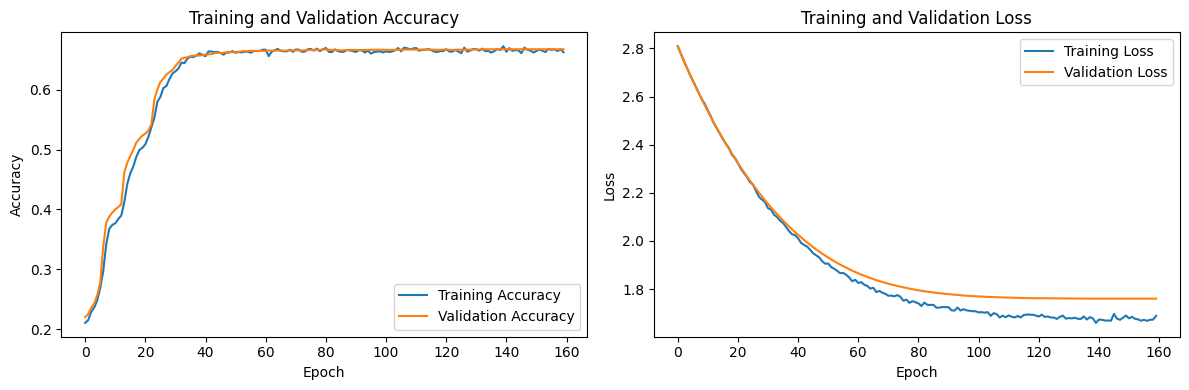

In [16]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model_voting.history['accuracy']
loss = historyensemble_model_voting.history['loss']
val_accuracy = historyensemble_model_voting.history['val_accuracy']
val_loss = historyensemble_model_voting.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 10 69.61%

In [12]:
model_1 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [19]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.3)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model10 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model10.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model10.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_4 (Functional)           (None, 7)            3842119     ['input_4[0][0]']                
                                                                                                  
 model_5 (Functional)           (None, 7)            5183431     ['input_4[0][0]']                
                                                                                                  
 model_6 (Functional)           (None, 7)            20191559    ['input_4[0][0]']                
                                                                                            

In [20]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model10/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model10/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model10/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model10/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
historyensemble_model10 = ensemble_model10.fit(
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.6095 - accuracy: 0.3201
Epoch 1: val_accuracy improved from -inf to 0.42728, saving model to models/ModelEnsamble/model10/64batch\best_model_ModelPaper1_1_0.4273.h5
359/359 [==============================] - 148s 370ms/step - loss: 2.6095 - accuracy: 0.3201 - val_loss: 2.4770 - val_accuracy: 0.4273 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.5746 - accuracy: 0.3528
Epoch 2: val_accuracy improved from 0.42728 to 0.47622, saving model to models/ModelEnsamble/model10/64batch\best_model_ModelPaper1_2_0.4762.h5
359/359 [==============================] - 58s 162ms/step - loss: 2.5746 - accuracy: 0.3528 - val_loss: 2.4440 - val_accuracy: 0.4762 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.5471 - accuracy: 0.3765
Epoch 3: val_accuracy improved from 0.47622 to 0.49869, saving model to models/ModelEnsamble/model10/64batch\best_model_M

In [22]:
ensemble_model10.evaluate(test_generator)

113/113 [==============================] - 26s 233ms/step - loss: 1.5123 - accuracy: 0.6962


[1.5123263597488403, 0.6961548924446106]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model10.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 9s 76ms/step
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       958
           1       0.89      0.59      0.71       111
           2       0.61      0.44      0.51      1024
           3       0.87      0.89      0.88      1774
           4       0.61      0.72      0.66      1233
           5       0.56      0.61      0.58      1247
           6       0.81      0.79      0.80       831

    accuracy                           0.70      7178
   macro avg       0.71      0.67      0.68      7178
weighted avg       0.70      0.70      0.69      7178

<function confusion_matrix at 0x0000023E0BDB8790>


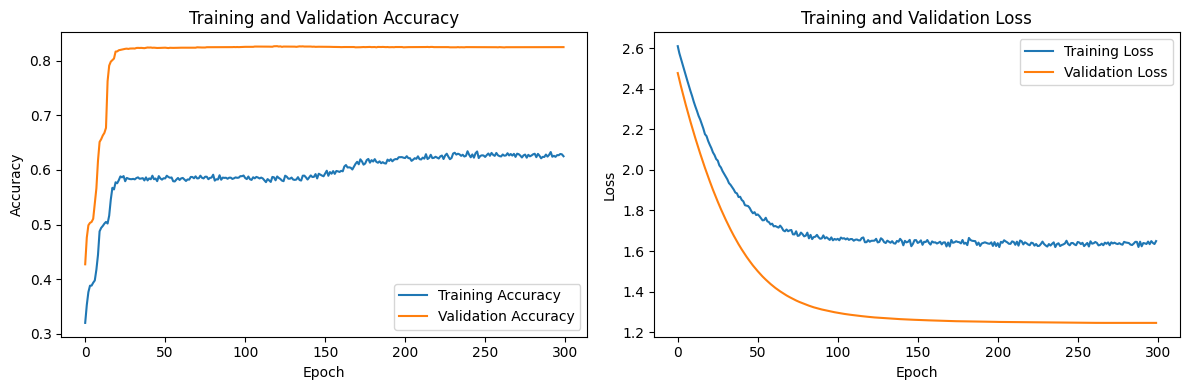

In [23]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model10.history['accuracy']
loss = historyensemble_model10.history['loss']
val_accuracy = historyensemble_model10.history['val_accuracy']
val_loss = historyensemble_model10.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 11 69.94%

In [34]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

#model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

#model_4 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

In [35]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model11 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model11.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model11.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_16 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                                  
 model_17 (Functional)          (None, 7)            3842119     ['input_6[0][0]']                
                                                                                                  
 model_18 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                           

In [36]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model11_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model11_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model11_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model11_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
historyensemble_model11 = ensemble_model11.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.1111 - accuracy: 0.2493
Epoch 1: val_accuracy improved from -inf to 0.30204, saving model to models/ModelEnsamble/model11_New/64batch\best_model_ModelPaper1_1_0.3020.h5
359/359 [==============================] - 61s 148ms/step - loss: 3.1111 - accuracy: 0.2493 - val_loss: 3.1213 - val_accuracy: 0.3020 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.0814 - accuracy: 0.2996
Epoch 2: val_accuracy improved from 0.30204 to 0.37189, saving model to models/ModelEnsamble/model11_New/64batch\best_model_ModelPaper1_2_0.3719.h5
359/359 [==============================] - 51s 142ms/step - loss: 3.0814 - accuracy: 0.2996 - val_loss: 3.0886 - val_accuracy: 0.3719 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 3.0532 - accuracy: 0.3416
Epoch 3: val_accuracy improved from 0.37189 to 0.40934, saving model to models/ModelEnsamble/model11_New/64batch\b

113/113 [==============================] - 9s 76ms/step - loss: 2.1136 - accuracy: 0.6995
[2.1135993003845215, 0.6994984745979309]


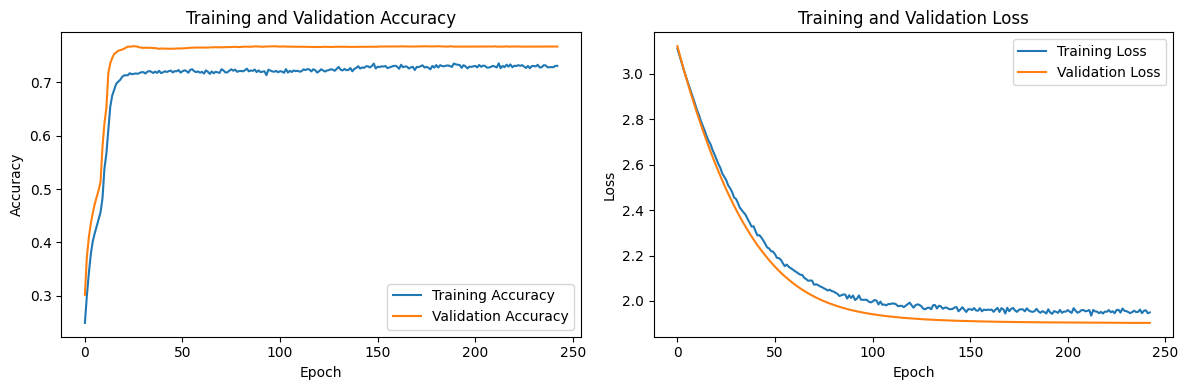

In [38]:
import matplotlib.pyplot as plt

print(ensemble_model11.evaluate(test_generator))

accuracy = historyensemble_model11.history['accuracy']
loss = historyensemble_model11.history['loss']
val_accuracy = historyensemble_model11.history['val_accuracy']
val_loss = historyensemble_model11.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
ensemble_model11.save('models/ModelEnsamble/model11_New/64batch/best_model_ModelPaper1_243_0.6994Test.h5')

## Model 12 70.14% mejor

In [39]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [40]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
#dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(ensemble_output)

#Se define el modelo final
ensemble_model12 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model12.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model12.summary()

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_22 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                                  
 model_23 (Functional)          (None, 7)            3842119     ['input_7[0][0]']                
                                                                                                  
 model_24 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                           

In [41]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model12_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model12_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model12_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model12_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [42]:
historyensemble_model12 = ensemble_model12.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.4704 - accuracy: 0.2346
Epoch 1: val_accuracy improved from -inf to 0.22853, saving model to models/ModelEnsamble/model12_New/64batch\best_model_ModelPaper1_1_0.2285.h5
359/359 [==============================] - 60s 156ms/step - loss: 3.4704 - accuracy: 0.2346 - val_loss: 3.4374 - val_accuracy: 0.2285 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.4397 - accuracy: 0.2382
Epoch 2: val_accuracy improved from 0.22853 to 0.23306, saving model to models/ModelEnsamble/model12_New/64batch\best_model_ModelPaper1_2_0.2331.h5
359/359 [==============================] - 55s 151ms/step - loss: 3.4397 - accuracy: 0.2382 - val_loss: 3.4066 - val_accuracy: 0.2331 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 3.4104 - accuracy: 0.2428
Epoch 3: val_accuracy improved from 0.23306 to 0.23898, saving model to models/ModelEnsamble/model12_New/64batch\b

In [45]:
evl = tf.keras.models.load_model(r'models\ModelEnsamble\model12_New\64batch\best_model_ModelPaper1_102_0.7708.h5')
print(evl.evaluate(test_generator))


113/113 [==============================] - 10s 79ms/step - loss: 2.3097 - accuracy: 0.7009
[2.309690237045288, 0.7008916139602661]


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = evl.predict(test_generator).argmax(axis=1) 

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 9s 78ms/step
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       958
           1       0.77      0.61      0.68       111
           2       0.61      0.45      0.52      1024
           3       0.89      0.88      0.88      1774
           4       0.60      0.74      0.67      1233
           5       0.60      0.57      0.59      1247
           6       0.80      0.83      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.68      0.68      7178
weighted avg       0.70      0.70      0.70      7178

<function confusion_matrix at 0x000001938BBF4820>


Text(95.72222222222221, 0.5, 'True labels')

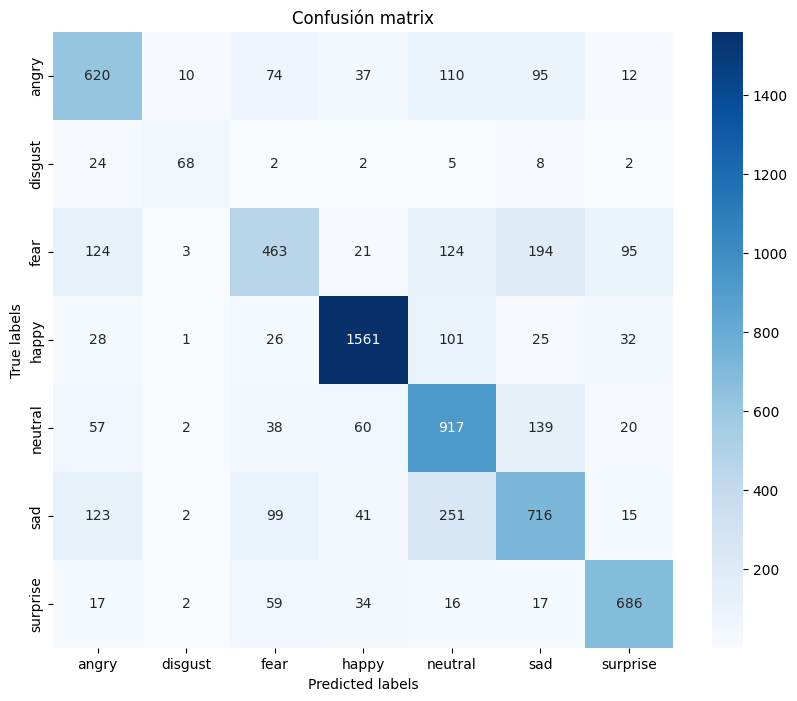

In [53]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

113/113 [==============================] - 9s 79ms/step


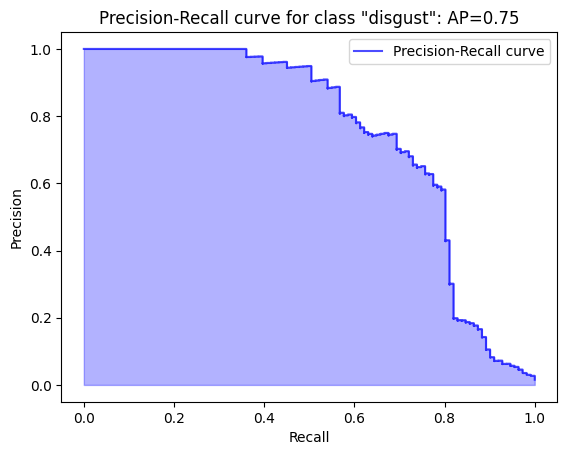

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = test_generator.classes
y_pred_prob = evl.predict(test_generator)


class_index = 1

y_true_bin = (y_true == class_index).astype(int)

y_pred_prob_disgust = y_pred_prob[:, class_index]

precision, recall, thresholds = precision_recall_curve(y_true_bin, y_pred_prob_disgust)

average_precision = average_precision_score(y_true_bin, y_pred_prob_disgust)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for class "disgust": AP={average_precision:0.2f}')
plt.legend(loc='best')
plt.show()

In [44]:
print(ensemble_model12.evaluate(test_generator))


113/113 [==============================] - 9s 80ms/step - loss: 2.3348 - accuracy: 0.7014
[2.33477520942688, 0.7014488577842712]


BUENO

In [46]:
ensemble_model12.save('models/ModelEnsamble/model12_New/64batch/best_model_ModelPaper1_191_0.7014Test.h5')

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model12.predict(test_generator).argmax(axis=1) 

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 9s 79ms/step
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       958
           1       0.78      0.63      0.70       111
           2       0.60      0.46      0.52      1024
           3       0.89      0.88      0.88      1774
           4       0.61      0.73      0.66      1233
           5       0.60      0.58      0.59      1247
           6       0.80      0.82      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.68      0.69      7178
weighted avg       0.70      0.70      0.70      7178

<function confusion_matrix at 0x000001938BBF4820>


Text(95.72222222222221, 0.5, 'True labels')

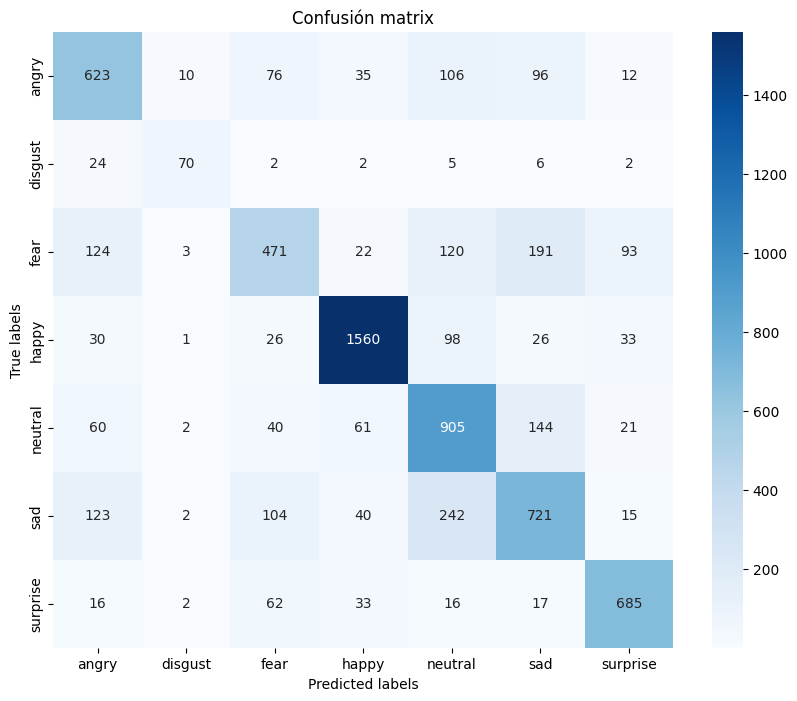

In [50]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

113/113 [==============================] - 9s 78ms/step


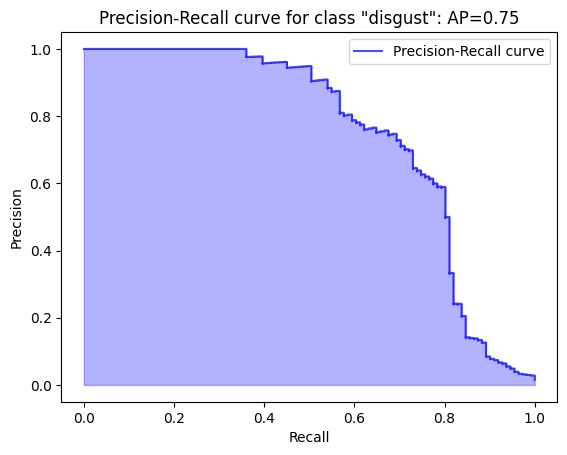

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = test_generator.classes
y_pred_prob = ensemble_model12.predict(test_generator)


class_index = 1

y_true_bin = (y_true == class_index).astype(int)

y_pred_prob_disgust = y_pred_prob[:, class_index]

precision, recall, thresholds = precision_recall_curve(y_true_bin, y_pred_prob_disgust)

average_precision = average_precision_score(y_true_bin, y_pred_prob_disgust)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for class "disgust": AP={average_precision:0.2f}')
plt.legend(loc='best')
plt.show()

113/113 [==============================] - 15s 128ms/step - loss: 2.3348 - accuracy: 0.7014
[2.33477520942688, 0.7014488577842712]


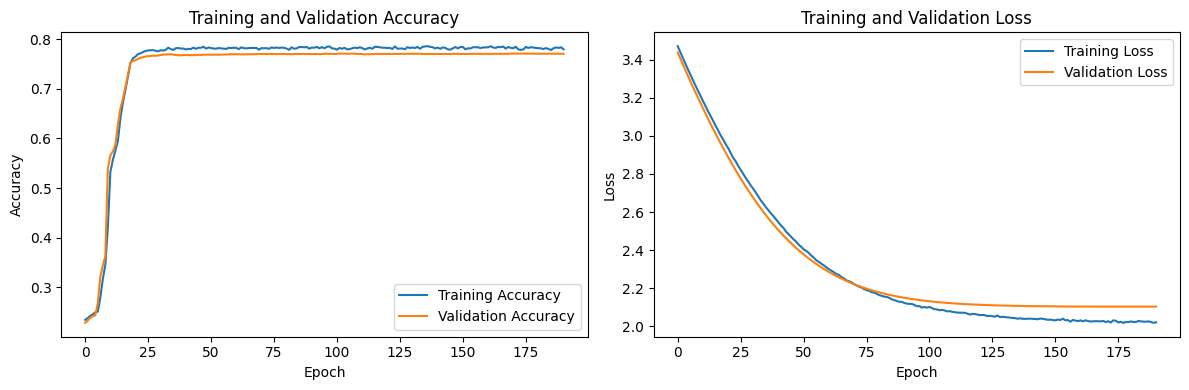

In [43]:
import matplotlib.pyplot as plt

print(ensemble_model12.evaluate(test_generator))

accuracy = historyensemble_model12.history['accuracy']
loss = historyensemble_model12.history['loss']
val_accuracy = historyensemble_model12.history['val_accuracy']
val_loss = historyensemble_model12.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 13 68.40%

In [65]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [66]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dense_out = Dense(1024, activation="relu")(ensemble_output)
dropout_layer = Dropout(0.5)(dense_out)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model14 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model14.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model14.summary()

Model: "model_68"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_65 (Functional)          (None, 7)            5183431     ['input_15[0][0]']               
                                                                                                  
 model_66 (Functional)          (None, 7)            3842119     ['input_15[0][0]']               
                                                                                                  
 model_67 (Functional)          (None, 7)            5183431     ['input_15[0][0]']               
                                                                                           

In [67]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model14/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model14/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model14/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model14/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [68]:
historyensemble_model14 = ensemble_model14.fit(
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.4501 - accuracy: 0.6810
Epoch 1: val_accuracy improved from -inf to 0.67427, saving model to models/ModelEnsamble/model14/64batch\best_model_ModelPaper1_1_0.6743.h5
359/359 [==============================] - 48s 129ms/step - loss: 2.4501 - accuracy: 0.6810 - val_loss: 2.0968 - val_accuracy: 0.6743 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 1.8510 - accuracy: 0.7291
Epoch 2: val_accuracy did not improve from 0.67427
359/359 [==============================] - 45s 125ms/step - loss: 1.8510 - accuracy: 0.7291 - val_loss: 1.7909 - val_accuracy: 0.6704 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 1.6243 - accuracy: 0.7250
Epoch 3: val_accuracy did not improve from 0.67427
359/359 [==============================] - 45s 125ms/step - loss: 1.6243 - accuracy: 0.7250 - val_loss: 1.7623 - val_accuracy: 0.6720 - lr: 1.0000e-04
Epoch 4/300
3

In [69]:
ensemble_model14.evaluate(test_generator)

113/113 [==============================] - 13s 109ms/step - loss: 1.7463 - accuracy: 0.6840


[1.7462843656539917, 0.684034526348114]

## Optimización model 4 68.44%

###  Optimizador RMSprop

In [97]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [101]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop, SGD


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model14 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model14.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate = 1e-4), metrics=["accuracy"])

ensemble_model14.summary()

Model: "model_87"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_84 (Functional)          (None, 7)            5183431     ['input_20[0][0]']               
                                                                                                  
 model_85 (Functional)          (None, 7)            3842119     ['input_20[0][0]']               
                                                                                                  
 model_86 (Functional)          (None, 7)            5183431     ['input_20[0][0]']               
                                                                                           

In [103]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model14/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model14/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model14/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model14/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [104]:
historyensemble_model14 = ensemble_model14.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7138 - accuracy: 0.1010
Epoch 1: val_accuracy improved from -inf to 0.11235, saving model to models/ModelEnsamble/model14/64batch\best_model_ModelPaper1_1_0.1123.h5
359/359 [==============================] - 48s 128ms/step - loss: 2.7138 - accuracy: 0.1010 - val_loss: 2.7602 - val_accuracy: 0.1123 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.6864 - accuracy: 0.1247
Epoch 2: val_accuracy improved from 0.11235 to 0.13029, saving model to models/ModelEnsamble/model14/64batch\best_model_ModelPaper1_2_0.1303.h5
359/359 [==============================] - 45s 125ms/step - loss: 2.6864 - accuracy: 0.1247 - val_loss: 2.7340 - val_accuracy: 0.1303 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.6601 - accuracy: 0.1471
Epoch 3: val_accuracy improved from 0.13029 to 0.15816, saving model to models/ModelEnsamble/model14/64batch\best_model_Mo

In [106]:
ensemble_model14.evaluate(test_generator)

113/113 [==============================] - 15s 131ms/step - loss: 1.7372 - accuracy: 0.6845


[1.7371890544891357, 0.684452474117279]

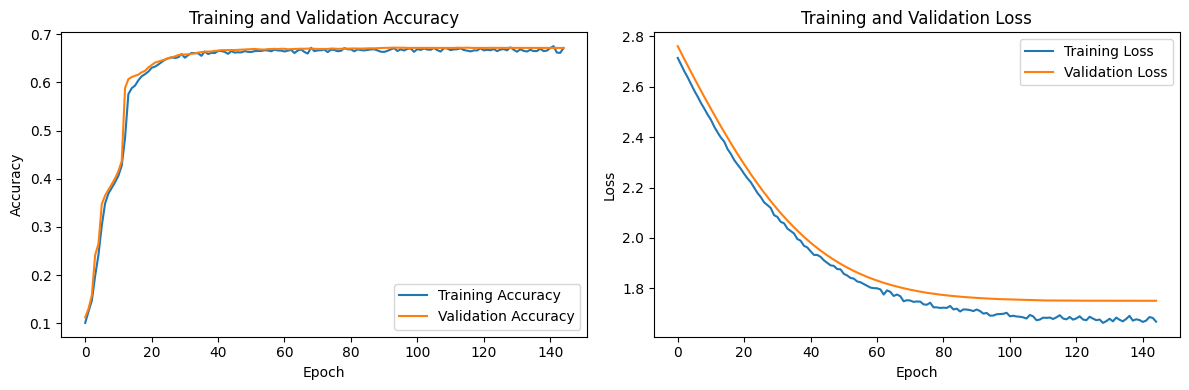

In [108]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model14.history['accuracy']
loss = historyensemble_model14.history['loss']
val_accuracy = historyensemble_model14.history['val_accuracy']
val_loss = historyensemble_model14.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model14.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 7s 59ms/step
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       958
           1       0.69      0.67      0.68       111
           2       0.58      0.44      0.50      1024
           3       0.90      0.85      0.88      1774
           4       0.59      0.75      0.66      1233
           5       0.61      0.50      0.55      1247
           6       0.76      0.85      0.80       831

    accuracy                           0.68      7178
   macro avg       0.67      0.67      0.67      7178
weighted avg       0.69      0.68      0.68      7178

<function confusion_matrix at 0x0000023E0BDB8790>


Text(95.72222222222221, 0.5, 'True labels')

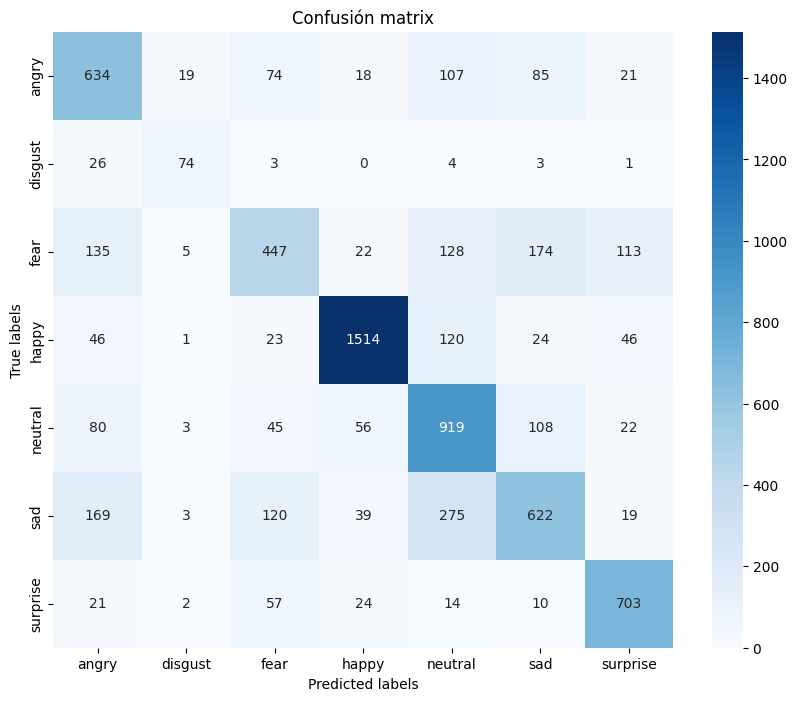

In [111]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Optimizador SGD

In [112]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [113]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop, SGD


for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model14_1 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model14_1.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = 1e-4), metrics=["accuracy"])

ensemble_model14_1.summary()

Model: "model_91"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_88 (Functional)          (None, 7)            5183431     ['input_21[0][0]']               
                                                                                                  
 model_89 (Functional)          (None, 7)            3842119     ['input_21[0][0]']               
                                                                                                  
 model_90 (Functional)          (None, 7)            5183431     ['input_21[0][0]']               
                                                                                           

In [114]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model14SGD/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model14SGD/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model14SGD/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model14SGD/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [115]:
historyensemble_model14_1 = ensemble_model14_1.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.8628 - accuracy: 0.0508
Epoch 1: val_accuracy improved from -inf to 0.04250, saving model to models/ModelEnsamble/model14SGD/64batch\best_model_ModelPaper1_1_0.0425.h5
359/359 [==============================] - 51s 134ms/step - loss: 2.8628 - accuracy: 0.0508 - val_loss: 2.8462 - val_accuracy: 0.0425 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.8598 - accuracy: 0.0532
Epoch 2: val_accuracy improved from 0.04250 to 0.04599, saving model to models/ModelEnsamble/model14SGD/64batch\best_model_ModelPaper1_2_0.0460.h5
359/359 [==============================] - 47s 129ms/step - loss: 2.8598 - accuracy: 0.0532 - val_loss: 2.8450 - val_accuracy: 0.0460 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.8595 - accuracy: 0.0515
Epoch 3: val_accuracy improved from 0.04599 to 0.04825, saving model to models/ModelEnsamble/model14SGD/64batch\best

KeyboardInterrupt: 

### Optimizador AdamW

In [121]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

In [123]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop, SGD
from tensorflow_addons.optimizers import AdamW



for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 3
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model14_3 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model14_3.compile(loss='categorical_crossentropy', optimizer=AdamW(learning_rate = 1e-4,  weight_decay=0.004), metrics=["accuracy"])

ensemble_model14_3.summary()

Model: "model_100"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_96 (Functional)          (None, 7)            5183431     ['input_24[0][0]']               
                                                                                                  
 model_97 (Functional)          (None, 7)            3842119     ['input_24[0][0]']               
                                                                                                  
 model_98 (Functional)          (None, 7)            5183431     ['input_24[0][0]']               
                                                                                          

In [124]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model14AdamW/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model14AdamW/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model14AdamW/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model14AdamW/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [125]:
historyensemble_model14_3 = ensemble_model14_3.fit(
    x = train_generator,
    epochs = 300,
    validation_data = val_generator, 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 2.7465 - accuracy: 0.2695
Epoch 1: val_accuracy improved from -inf to 0.33984, saving model to models/ModelEnsamble/model14AdamW/64batch\best_model_ModelPaper1_1_0.3398.h5
359/359 [==============================] - 49s 131ms/step - loss: 2.7465 - accuracy: 0.2695 - val_loss: 2.7728 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 2.7501 - accuracy: 0.3633
Epoch 2: val_accuracy improved from 0.33984 to 0.41979, saving model to models/ModelEnsamble/model14AdamW/64batch\best_model_ModelPaper1_2_0.4198.h5
359/359 [==============================] - 45s 124ms/step - loss: 2.7501 - accuracy: 0.3633 - val_loss: 2.7572 - val_accuracy: 0.4198 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.7525 - accuracy: 0.5611
Epoch 3: val_accuracy improved from 0.41979 to 0.65912, saving model to models/ModelEnsamble/model14AdamW/64batc

In [126]:
ensemble_model14_3.evaluate(test_generator)

113/113 [==============================] - 14s 122ms/step - loss: 2.7522 - accuracy: 0.6757


[2.7521958351135254, 0.6756756901741028]

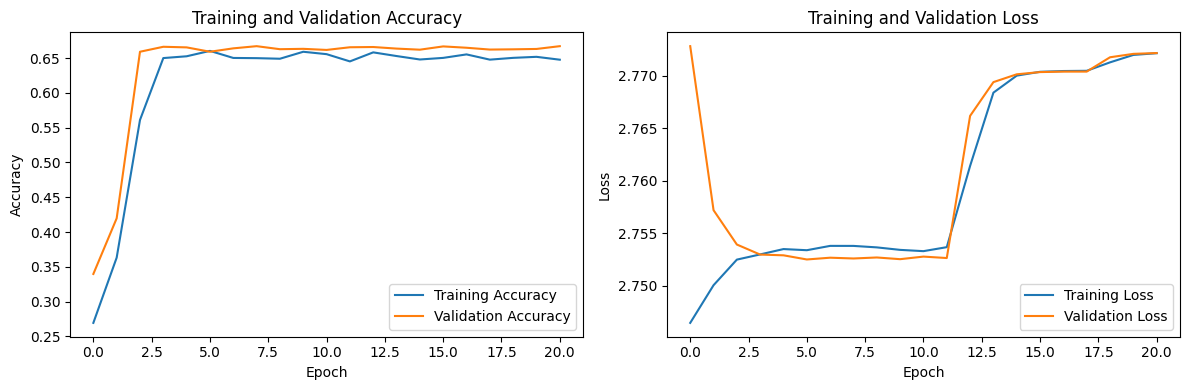

In [128]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model14_3.history['accuracy']
loss = historyensemble_model14_3.history['loss']
val_accuracy = historyensemble_model14_3.history['val_accuracy']
val_loss = historyensemble_model14_3.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 14 69.08%

In [7]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test6_MoreData/64batch\best_model_ModelPaper2_69_0.6759.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

#model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

#model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

#model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

#model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [8]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam


for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 4
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
#dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(ensemble_output)

#Se define el modelo final
ensemble_model15 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model15.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model15.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 7)            5183431     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 7)            3842119     ['input_1[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 7)            5183431     ['input_1[0][0]']                
                                                                                            

In [9]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model15_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model15_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model15_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model15_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

In [10]:
historyensemble_model15 = ensemble_model15.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.0522 - accuracy: 0.1208
Epoch 1: val_accuracy improved from -inf to 0.13134, saving model to models/ModelEnsamble/model15_New/64batch\best_model_ModelPaper1_1_0.1313.h5
359/359 [==============================] - 136s 352ms/step - loss: 3.0522 - accuracy: 0.1208 - val_loss: 2.9623 - val_accuracy: 0.1313 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.0237 - accuracy: 0.1652
Epoch 2: val_accuracy improved from 0.13134 to 0.19213, saving model to models/ModelEnsamble/model15_New/64batch\best_model_ModelPaper1_2_0.1921.h5
359/359 [==============================] - 47s 131ms/step - loss: 3.0237 - accuracy: 0.1652 - val_loss: 2.9336 - val_accuracy: 0.1921 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 2.9938 - accuracy: 0.2784
Epoch 3: val_accuracy improved from 0.19213 to 0.31162, saving model to models/ModelEnsamble/model15_New/64batch\

In [11]:
ensemble_model15.evaluate(test_generator)

113/113 [==============================] - 26s 229ms/step - loss: 1.9306 - accuracy: 0.6909


[1.9306432008743286, 0.6908609867095947]

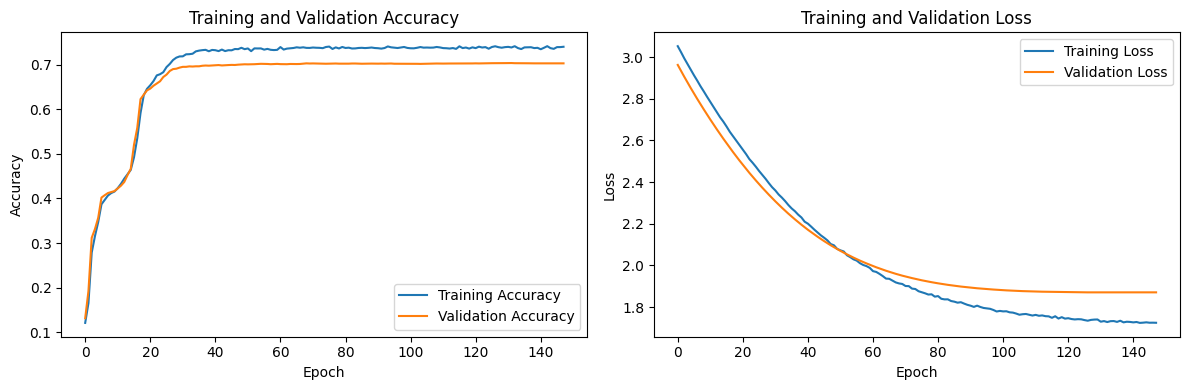

In [12]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model15.history['accuracy']
loss = historyensemble_model15.history['loss']
val_accuracy = historyensemble_model15.history['val_accuracy']
val_loss = historyensemble_model15.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 15 70.11%

In [13]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)


In [14]:

from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.2)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model16 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model16.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model16.summary()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_5 (Functional)           (None, 7)            5183431     ['input_2[0][0]']                
                                                                                                  
 model_6 (Functional)           (None, 7)            3842119     ['input_2[0][0]']                
                                                                                                  
 model_7 (Functional)           (None, 7)            5183431     ['input_2[0][0]']                
                                                                                           

In [15]:

#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model16_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model16_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model16_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model16_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
historyensemble_model16 = ensemble_model16.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.3567 - accuracy: 0.1705
Epoch 1: val_accuracy improved from -inf to 0.14928, saving model to models/ModelEnsamble/model16_New/64batch\best_model_ModelPaper1_1_0.1493.h5
359/359 [==============================] - 72s 190ms/step - loss: 3.3567 - accuracy: 0.1705 - val_loss: 3.3757 - val_accuracy: 0.1493 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.3296 - accuracy: 0.1732
Epoch 2: val_accuracy improved from 0.14928 to 0.16060, saving model to models/ModelEnsamble/model16_New/64batch\best_model_ModelPaper1_2_0.1606.h5
359/359 [==============================] - 67s 185ms/step - loss: 3.3296 - accuracy: 0.1732 - val_loss: 3.3468 - val_accuracy: 0.1606 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 3.3001 - accuracy: 0.1849
Epoch 3: val_accuracy improved from 0.16060 to 0.17401, saving model to models/ModelEnsamble/model16_New/64batch\b

In [18]:
ensemble_model16.evaluate(test_generator)

113/113 [==============================] - 17s 152ms/step - loss: 2.3002 - accuracy: 0.7012


[2.300179958343506, 0.7011702656745911]

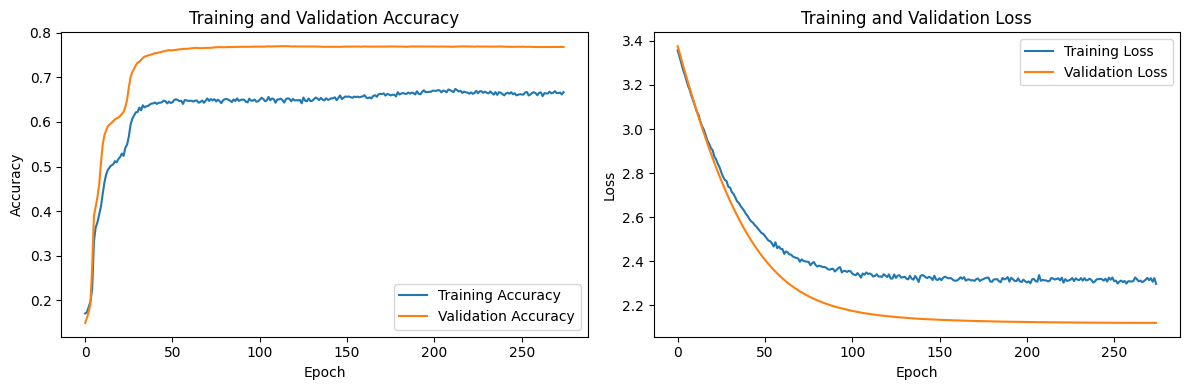

In [17]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model16.history['accuracy']
loss = historyensemble_model16.history['loss']
val_accuracy = historyensemble_model16.history['val_accuracy']
val_loss = historyensemble_model16.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 16 70.01%

In [27]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test6_MoreData/64batch\best_model_ModelPaper2_69_0.6759.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [28]:

from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model17 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model17.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model17.summary()

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_26 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                                  
 model_27 (Functional)          (None, 7)            3842119     ['input_5[0][0]']                
                                                                                                  
 model_28 (Functional)          (None, 7)            5183431     ['input_5[0][0]']                
                                                                                           

In [29]:

#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model17_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model17_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model17_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model17_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
historyensemble_model17 = ensemble_model17.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.2978 - accuracy: 0.1133
Epoch 1: val_accuracy improved from -inf to 0.11705, saving model to models/ModelEnsamble/model17_New/64batch\best_model_ModelPaper1_1_0.1171.h5
359/359 [==============================] - 61s 161ms/step - loss: 3.2978 - accuracy: 0.1133 - val_loss: 3.2935 - val_accuracy: 0.1171 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.2704 - accuracy: 0.1248
Epoch 2: val_accuracy improved from 0.11705 to 0.13203, saving model to models/ModelEnsamble/model17_New/64batch\best_model_ModelPaper1_2_0.1320.h5
359/359 [==============================] - 55s 154ms/step - loss: 3.2704 - accuracy: 0.1248 - val_loss: 3.2615 - val_accuracy: 0.1320 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 3.2401 - accuracy: 0.2039
Epoch 3: val_accuracy improved from 0.13203 to 0.33269, saving model to models/ModelEnsamble/model17_New/64batch\b

In [31]:
ensemble_model17.evaluate(test_generator)

113/113 [==============================] - 15s 132ms/step - loss: 2.2390 - accuracy: 0.7002


[2.2389657497406006, 0.7001950144767761]

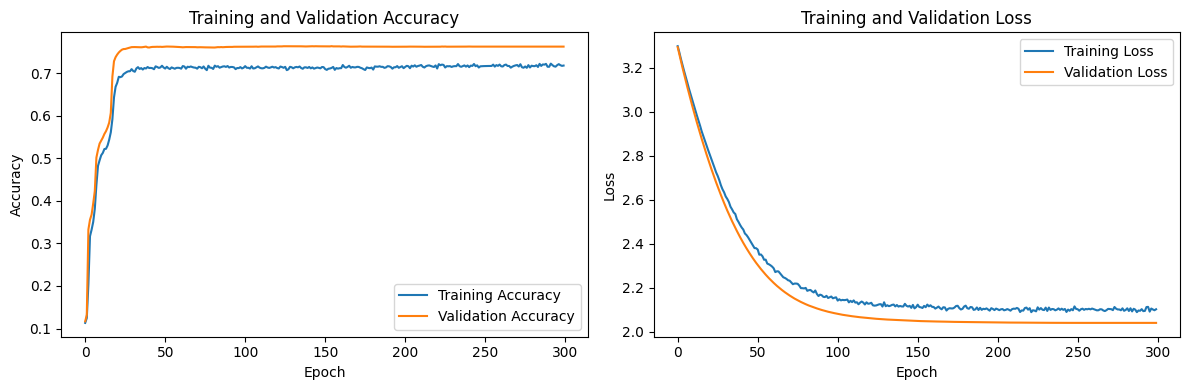

In [32]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model17.history['accuracy']
loss = historyensemble_model17.history['loss']
val_accuracy = historyensemble_model17.history['val_accuracy']
val_loss = historyensemble_model17.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 17 69.94%

In [33]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test6_MoreData/64batch\best_model_ModelPaper2_69_0.6759.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

In [34]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 5
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.05)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model18 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model18.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model18.summary()

Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_33 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                                  
 model_34 (Functional)          (None, 7)            3842119     ['input_6[0][0]']                
                                                                                                  
 model_35 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                           

In [35]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/model18_New/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/model18_New/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/model18_New/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/model18_New/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [36]:
historyensemble_model18 = ensemble_model18.fit( #ULTIMO
    x = train_generator,
    epochs = 300,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/300
359/359 [==============================] - ETA: 0s - loss: 3.1162 - accuracy: 0.1658
Epoch 1: val_accuracy improved from -inf to 0.15990, saving model to models/ModelEnsamble/model18_New/64batch\best_model_ModelPaper1_1_0.1599.h5
359/359 [==============================] - 57s 148ms/step - loss: 3.1162 - accuracy: 0.1658 - val_loss: 3.0895 - val_accuracy: 0.1599 - lr: 1.0000e-04
Epoch 2/300
359/359 [==============================] - ETA: 0s - loss: 3.0877 - accuracy: 0.1708
Epoch 2: val_accuracy improved from 0.15990 to 0.16757, saving model to models/ModelEnsamble/model18_New/64batch\best_model_ModelPaper1_2_0.1676.h5
359/359 [==============================] - 52s 144ms/step - loss: 3.0877 - accuracy: 0.1708 - val_loss: 3.0594 - val_accuracy: 0.1676 - lr: 1.0000e-04
Epoch 3/300
359/359 [==============================] - ETA: 0s - loss: 3.0591 - accuracy: 0.1922
Epoch 3: val_accuracy improved from 0.16757 to 0.22836, saving model to models/ModelEnsamble/model18_New/64batch\b

In [44]:
ensemble_model_8_load = tf.keras.models.load_model(r'C:\Users\bryan\OneDrive\Escritorio\Tesis\Codigo tesis\Imagen\Code 2\code3\models\ModelEnsamble\model18_New\64batch\best_model_ModelPaper1_59_0.7610.h5')
ensemble_model_8_load.evaluate(test_generator)

113/113 [==============================] - 9s 71ms/step - loss: 2.1302 - accuracy: 0.6980


[2.130220651626587, 0.6979659795761108]

In [38]:
ensemble_model18.evaluate(test_generator)

113/113 [==============================] - 14s 119ms/step - loss: 2.0501 - accuracy: 0.6995


[2.050055980682373, 0.6994984745979309]

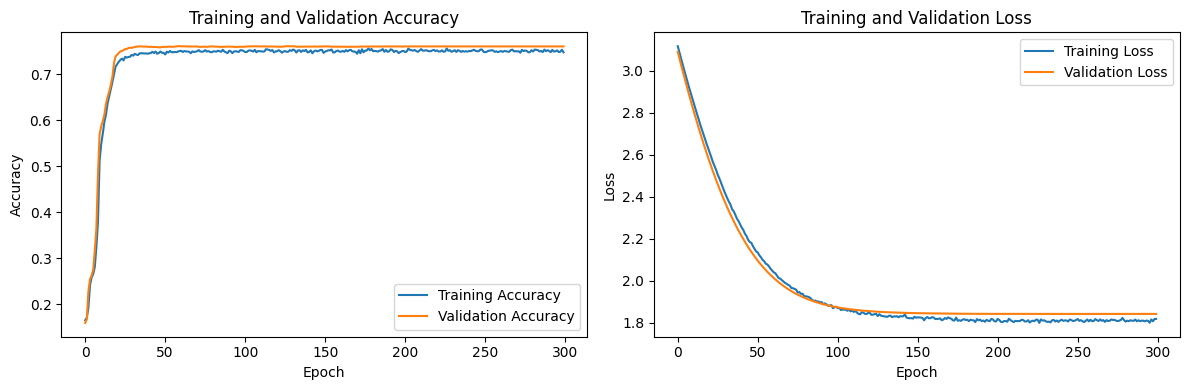

In [37]:
import matplotlib.pyplot as plt


accuracy = historyensemble_model18.history['accuracy']
loss = historyensemble_model18.history['loss']
val_accuracy = historyensemble_model18.history['val_accuracy']
val_loss = historyensemble_model18.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Optimización Model 12 70.20% mejor

### Rmsprop 70.10%

In [20]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [21]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
#dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(ensemble_output)

#Se define el modelo final
ensemble_model_RMSProp = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_RMSProp.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-4), metrics=["accuracy"])

ensemble_model_RMSProp.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_8 (Functional)           (None, 7)            5183431     ['input_1[0][0]']                
                                                                                                  
 model_9 (Functional)           (None, 7)            3842119     ['input_1[0][0]']                
                                                                                                  
 model_10 (Functional)          (None, 7)            5183431     ['input_1[0][0]']                
                                                                                           

In [23]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [24]:
historyensemble_modelRMSProp = ensemble_model_RMSProp.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.2995 - accuracy: 0.2704
Epoch 1: val_accuracy improved from -inf to 0.27295, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch\best_model_ModelPaper1_1_0.2729.h5
359/359 [==============================] - 87s 231ms/step - loss: 3.2995 - accuracy: 0.2704 - val_loss: 3.2816 - val_accuracy: 0.2729 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.2695 - accuracy: 0.2982
Epoch 2: val_accuracy improved from 0.27295 to 0.29524, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_RMSprop/64batch\best_model_ModelPaper1_2_0.2952.h5
359/359 [==============================] - 57s 158ms/step - loss: 3.2695 - accuracy: 0.2982 - val_loss: 3.2496 - val_accuracy: 0.2952 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.2409 - accuracy: 0.3512
Epoch 3: val_accuracy improved from 0.29524 to 0.365

In [41]:
ensemble_model_RSMProp_load = tf.keras.models.load_model(r'C:\Users\bryan\OneDrive\Escritorio\Tesis\Codigo tesis\Imagen\Code 2\code3\models\ModelEnsamble\optimizacionModel13\model12_13_New_RMSprop\64batch\best_model_ModelPaper1_126_0.7699.h5')
ensemble_model_RSMProp_load.evaluate(test_generator)

113/113 [==============================] - 10s 79ms/step - loss: 2.3145 - accuracy: 0.7006


[2.314474105834961, 0.7006129622459412]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model_RSMProp_load.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 12s 98ms/step
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       958
           1       0.79      0.61      0.69       111
           2       0.61      0.45      0.52      1024
           3       0.89      0.88      0.88      1774
           4       0.60      0.74      0.66      1233
           5       0.60      0.58      0.59      1247
           6       0.80      0.82      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.68      0.68      7178
weighted avg       0.70      0.70      0.70      7178

<function confusion_matrix at 0x000002C08BC94820>


Text(95.72222222222221, 0.5, 'True labels')

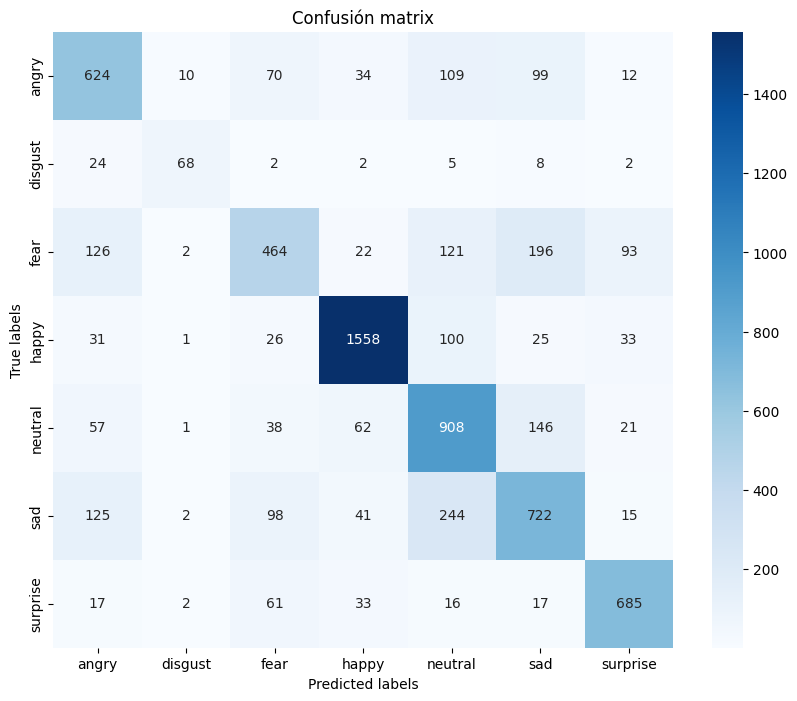

In [43]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [30]:
ensemble_model_RMSProp.evaluate(test_generator)

113/113 [==============================] - 30s 263ms/step - loss: 2.3328 - accuracy: 0.7010


[2.3327670097351074, 0.7010309100151062]

In [33]:
ensemble_model_RMSProp.save('models\ModelEnsamble\optimizacionModel13\model12_13_New_RMSprop/64batch/best_model_ModelPaper1_180_0.7103Test.h5')

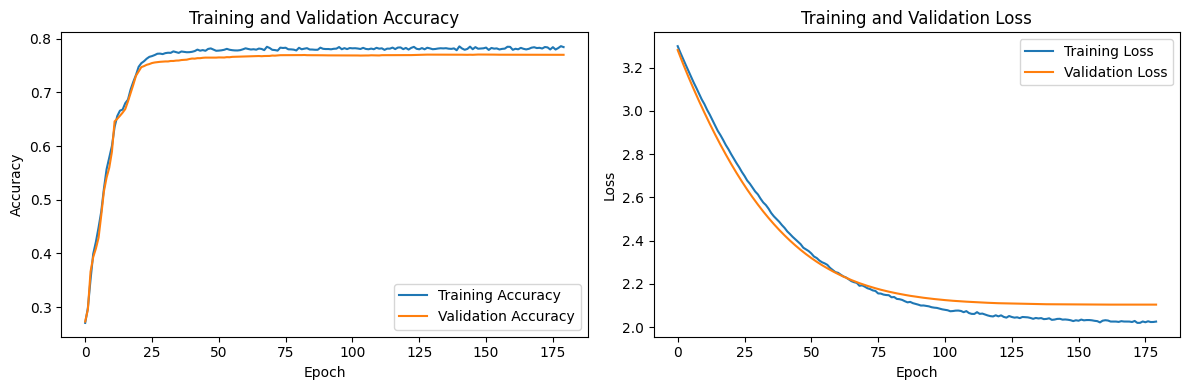

In [25]:
import matplotlib.pyplot as plt


accuracy = historyensemble_modelRMSProp.history['accuracy']
loss = historyensemble_modelRMSProp.history['loss']
val_accuracy = historyensemble_modelRMSProp.history['val_accuracy']
val_loss = historyensemble_modelRMSProp.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### SGD 58.68%

In [44]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [45]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop, SGD

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
#dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(ensemble_output)

#Se define el modelo final
ensemble_model_SGD = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_SGD.compile(loss='categorical_crossentropy', optimizer=SGD(1e-4), metrics=["accuracy"])

ensemble_model_SGD.summary()

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_22 (Functional)          (None, 7)            5183431     ['input_3[0][0]']                
                                                                                                  
 model_23 (Functional)          (None, 7)            3842119     ['input_3[0][0]']                
                                                                                                  
 model_24 (Functional)          (None, 7)            5183431     ['input_3[0][0]']                
                                                                                           

In [46]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [47]:
historyensemble_modelSGD = ensemble_model_SGD.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.2541 - accuracy: 0.3291
Epoch 1: val_accuracy improved from -inf to 0.34698, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch\best_model_ModelPaper1_1_0.3470.h5
359/359 [==============================] - 64s 166ms/step - loss: 3.2541 - accuracy: 0.3291 - val_loss: 3.2734 - val_accuracy: 0.3470 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.2529 - accuracy: 0.3303
Epoch 2: val_accuracy improved from 0.34698 to 0.34907, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_SGD/64batch\best_model_ModelPaper1_2_0.3491.h5
359/359 [==============================] - 56s 156ms/step - loss: 3.2529 - accuracy: 0.3303 - val_loss: 3.2718 - val_accuracy: 0.3491 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.2518 - accuracy: 0.3339
Epoch 3: val_accuracy improved from 0.34907 to 0.35203, savi

RuntimeError: Can't decrement id ref count (unable to extend file properly)

### Adamax 70.04%

In [49]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [50]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop, SGD, Adamax

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
#dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(ensemble_output)

#Se define el modelo final
ensemble_model_Adamax = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_Adamax.compile(loss='categorical_crossentropy', optimizer=Adamax(1e-4), metrics=["accuracy"])

ensemble_model_Adamax.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_29 (Functional)          (None, 7)            5183431     ['input_4[0][0]']                
                                                                                                  
 model_30 (Functional)          (None, 7)            3842119     ['input_4[0][0]']                
                                                                                                  
 model_31 (Functional)          (None, 7)            5183431     ['input_4[0][0]']                
                                                                                           

In [51]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [52]:
historyensemble_modelAdamax = ensemble_model_Adamax.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.3365 - accuracy: 0.1601
Epoch 1: val_accuracy improved from -inf to 0.14335, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch\best_model_ModelPaper1_1_0.1434.h5
359/359 [==============================] - 63s 163ms/step - loss: 3.3365 - accuracy: 0.1601 - val_loss: 3.3451 - val_accuracy: 0.1434 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.3208 - accuracy: 0.1755
Epoch 2: val_accuracy improved from 0.14335 to 0.15868, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adamax/64batch\best_model_ModelPaper1_2_0.1587.h5
359/359 [==============================] - 55s 153ms/step - loss: 3.3208 - accuracy: 0.1755 - val_loss: 3.3263 - val_accuracy: 0.1587 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.3072 - accuracy: 0.1965
Epoch 3: val_accuracy improved from 0.15868 to 0.21111

In [61]:
ensemble_model_AdamxLoad_model2 = tf.keras.models.load_model(r'C:\Users\bryan\OneDrive\Escritorio\Tesis\Codigo tesis\Imagen\Code 2\code3\models\ModelEnsamble\optimizacionModel13\model12_13_New_Adamax\64batch\best_model_ModelPaper1_175_0.7678.h5')
ensemble_model_AdamxLoad_model2.evaluate(test_generator)

113/113 [==============================] - 10s 80ms/step - loss: 2.3313 - accuracy: 0.7005


[2.331277847290039, 0.7004736661911011]

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model_AdamxLoad_model2.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 10s 79ms/step
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       958
           1       0.78      0.61      0.69       111
           2       0.61      0.44      0.51      1024
           3       0.89      0.88      0.88      1774
           4       0.60      0.75      0.66      1233
           5       0.60      0.57      0.58      1247
           6       0.79      0.83      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.68      0.68      7178
weighted avg       0.70      0.70      0.70      7178

<function confusion_matrix at 0x000002C08BC94820>


Text(95.72222222222221, 0.5, 'True labels')

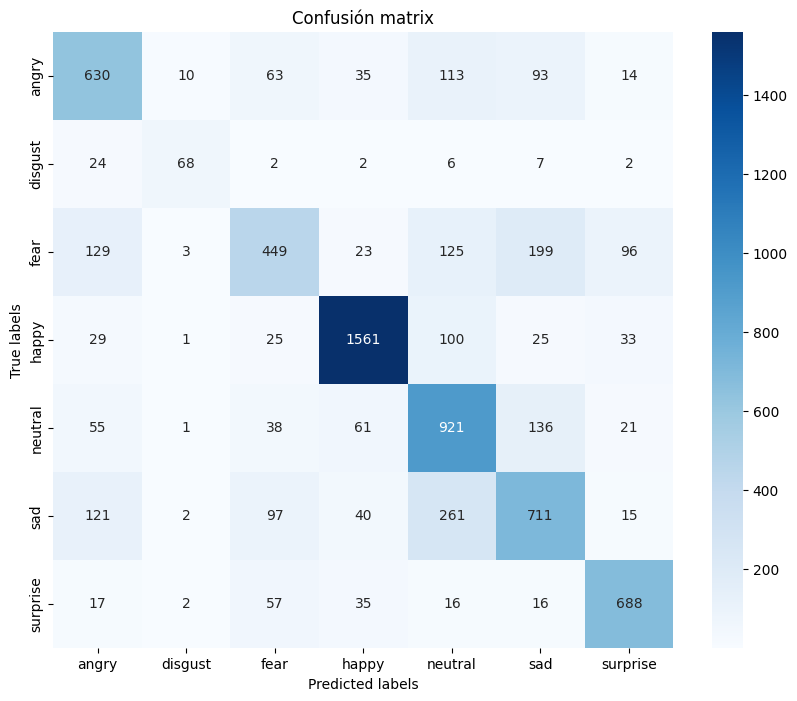

In [63]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [72]:
ensemble_model_AdamxLoad_model = tf.keras.models.load_model(r'models\ModelEnsamble\optimizacionModel13\model12_13_New_Adamax\64batch\best_model_ModelPaper1_128_0.7650.h5')
ensemble_model_AdamxLoad_model.evaluate(test_generator)

113/113 [==============================] - 13s 107ms/step - loss: 2.3747 - accuracy: 0.7002


[2.374678373336792, 0.7001950144767761]

In [54]:
ensemble_model_Adamax.evaluate(test_generator)

113/113 [==============================] - 15s 133ms/step - loss: 2.3232 - accuracy: 0.7001


[2.323169708251953, 0.700055718421936]

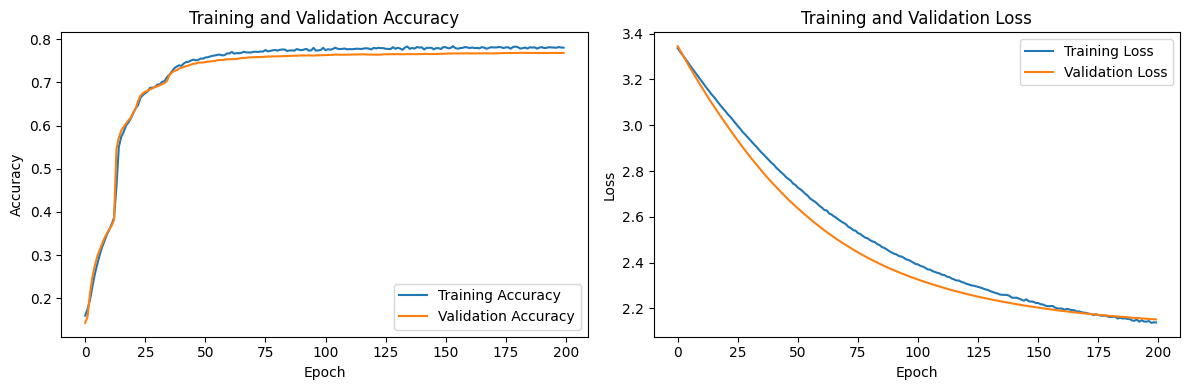

In [53]:
import matplotlib.pyplot as plt


accuracy = historyensemble_modelAdamax.history['accuracy']
loss = historyensemble_modelAdamax.history['loss']
val_accuracy = historyensemble_modelAdamax.history['val_accuracy']
val_loss = historyensemble_modelAdamax.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Dropout

#### 0.1 70.14%

In [85]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [86]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.1)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model_Adam01 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_Adam01.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model_Adam01.summary()

Model: "model_56"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_50 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                                  
 model_51 (Functional)          (None, 7)            3842119     ['input_7[0][0]']                
                                                                                                  
 model_52 (Functional)          (None, 7)            5183431     ['input_7[0][0]']                
                                                                                           

In [87]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [88]:
historyensemble_modelAdam01 = ensemble_model_Adam01.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.4408 - accuracy: 0.0353
Epoch 1: val_accuracy improved from -inf to 0.03048, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch\best_model_ModelPaper1_1_0.0305.h5
359/359 [==============================] - 60s 158ms/step - loss: 3.4408 - accuracy: 0.0353 - val_loss: 3.4572 - val_accuracy: 0.0305 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.4107 - accuracy: 0.0451
Epoch 2: val_accuracy improved from 0.03048 to 0.03519, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch\best_model_ModelPaper1_2_0.0352.h5
359/359 [==============================] - 56s 155ms/step - loss: 3.4107 - accuracy: 0.0451 - val_loss: 3.4234 - val_accuracy: 0.0352 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.3791 - accuracy: 0.0524
Epoch 3: val_accuracy improved from 0.03519 to 0.0

In [105]:
pathmodels = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.1/64batch/'

best_model_name3 = ''
best_model_accuracy3 = float('-inf')
for modelFile in os.listdir(pathmodels):
    pathfilenow = os.path.join(pathmodels,modelFile)
    ensemble_model_Adam005_load_model3 = tf.keras.models.load_model(pathfilenow)
    responseeval2 = ensemble_model_Adam005_load_model3.evaluate(test_generator)
    lossresponse,accuracyresponse = responseeval2
    print(accuracyresponse)
    if accuracyresponse > best_model_accuracy3:
        best_model_accuracy3 = accuracyresponse
        best_model_name3 = pathfilenow
print(best_model_accuracy3,best_model_name3)

113/113 [==============================] - 13s 105ms/step - loss: 3.1913 - accuracy: 0.5276
0.5275843143463135
113/113 [==============================] - 10s 80ms/step - loss: 3.1645 - accuracy: 0.5320
0.5320423245429993
113/113 [==============================] - 10s 79ms/step - loss: 3.1382 - accuracy: 0.5362
0.5362218022346497
113/113 [==============================] - 10s 79ms/step - loss: 3.1124 - accuracy: 0.5414
0.5413764119148254
113/113 [==============================] - 10s 80ms/step - loss: 2.3056 - accuracy: 0.7009
0.7008916139602661
113/113 [==============================] - 10s 80ms/step - loss: 3.0871 - accuracy: 0.5483
0.5483421683311462
113/113 [==============================] - 10s 80ms/step - loss: 3.0622 - accuracy: 0.5649
0.5649206042289734
113/113 [==============================] - 10s 79ms/step - loss: 3.0380 - accuracy: 0.6333
0.6333240270614624
113/113 [==============================] - 10s 80ms/step - loss: 3.0141 - accuracy: 0.6388
0.6387572884559631
113/113 [

In [89]:
ensemble_model_Adam01.evaluate(test_generator)

113/113 [==============================] - 12s 100ms/step - loss: 2.3112 - accuracy: 0.7014


[2.311154365539551, 0.7014488577842712]

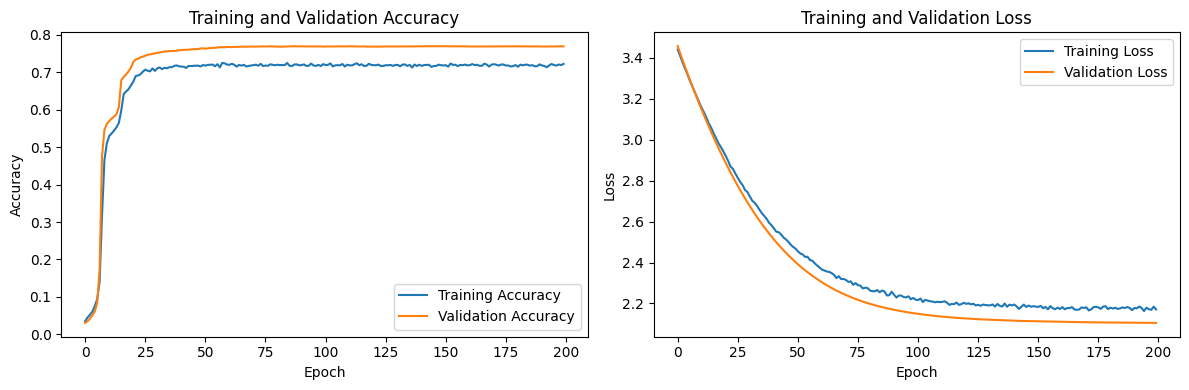

In [90]:
import matplotlib.pyplot as plt


accuracy = historyensemble_modelAdam01.history['accuracy']
loss = historyensemble_modelAdam01.history['loss']
val_accuracy = historyensemble_modelAdam01.history['val_accuracy']
val_loss = historyensemble_modelAdam01.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 0.01 70.13%

In [79]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [80]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.01)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model_Adam001 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_Adam001.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model_Adam001.summary()

Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model_43 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                                  
 model_44 (Functional)          (None, 7)            3842119     ['input_6[0][0]']                
                                                                                                  
 model_45 (Functional)          (None, 7)            5183431     ['input_6[0][0]']                
                                                                                           

In [81]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [82]:
historyensemble_modelAdam001 = ensemble_model_Adam001.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.4764 - accuracy: 0.1558
Epoch 1: val_accuracy improved from -inf to 0.14771, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch\best_model_ModelPaper1_1_0.1477.h5
359/359 [==============================] - 61s 159ms/step - loss: 3.4764 - accuracy: 0.1558 - val_loss: 3.4657 - val_accuracy: 0.1477 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.4462 - accuracy: 0.1568
Epoch 2: val_accuracy improved from 0.14771 to 0.14788, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch\best_model_ModelPaper1_2_0.1479.h5
359/359 [==============================] - 56s 154ms/step - loss: 3.4462 - accuracy: 0.1568 - val_loss: 3.4324 - val_accuracy: 0.1479 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.4155 - accuracy: 0.1581
Epoch 3: val_accuracy improved from 0.14788 to 0

In [83]:
ensemble_model_Adam001.evaluate(test_generator)

113/113 [==============================] - 12s 101ms/step - loss: 2.3313 - accuracy: 0.7010


[2.331282377243042, 0.7010309100151062]

In [104]:
pathmodels = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.01/64batch/'

best_model_name2 = ''
best_model_accuracy2 = float('-inf')
for modelFile in os.listdir(pathmodels):
    pathfilenow = os.path.join(pathmodels,modelFile)
    ensemble_model_Adam005_load_model2 = tf.keras.models.load_model(pathfilenow)
    responseeval2 = ensemble_model_Adam005_load_model2.evaluate(test_generator)
    lossresponse,accuracyresponse = responseeval2
    print(accuracyresponse)
    if accuracyresponse > best_model_accuracy2:
        best_model_accuracy2 = accuracyresponse
        best_model_name2 = pathfilenow
print(best_model_accuracy2,best_model_name2)

113/113 [==============================] - 10s 80ms/step - loss: 2.3100 - accuracy: 0.6999
0.699916422367096
113/113 [==============================] - 10s 81ms/step - loss: 2.3097 - accuracy: 0.6999
0.699916422367096
113/113 [==============================] - 10s 81ms/step - loss: 2.3094 - accuracy: 0.7001
0.700055718421936
113/113 [==============================] - 11s 88ms/step - loss: 3.1992 - accuracy: 0.5393
0.539286732673645
113/113 [==============================] - 11s 84ms/step - loss: 3.1728 - accuracy: 0.5603
0.5603232383728027
113/113 [==============================] - 10s 80ms/step - loss: 3.1465 - accuracy: 0.5743
0.5742546916007996
113/113 [==============================] - 10s 80ms/step - loss: 3.1209 - accuracy: 0.5821
0.5820562839508057
113/113 [==============================] - 10s 80ms/step - loss: 2.3201 - accuracy: 0.7005
0.7004736661911011
113/113 [==============================] - 10s 80ms/step - loss: 3.0957 - accuracy: 0.5887
0.5887433886528015
113/113 [=====

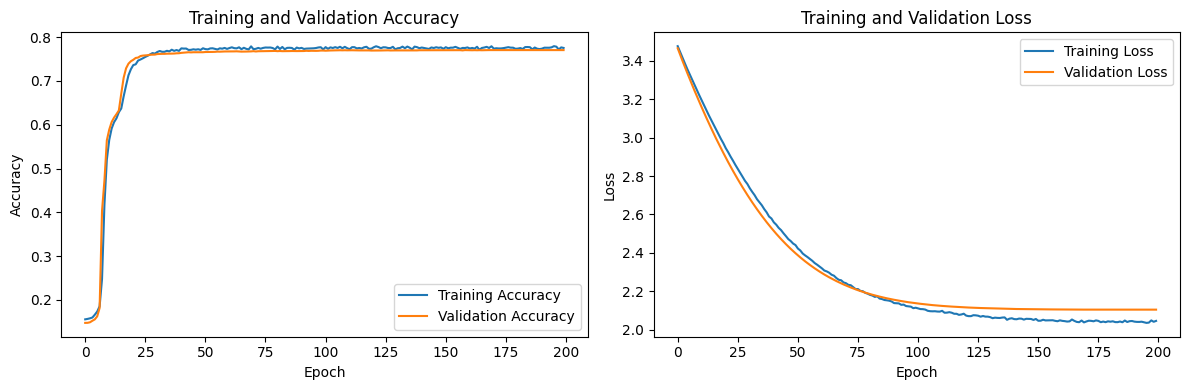

In [84]:
import matplotlib.pyplot as plt


accuracy = historyensemble_modelAdam001.history['accuracy']
loss = historyensemble_modelAdam001.history['loss']
val_accuracy = historyensemble_modelAdam001.history['val_accuracy']
val_loss = historyensemble_modelAdam001.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 0.05 70.20% mejor

In [10]:
model_1 = tf.keras.models.load_model(r'models\test8_MoreData4_otherImageGenerator4\64batch\best_model_ModelPaper2_103_0.6588.h5')

model_1 = Model(inputs = model_1.inputs, outputs=model_1.output)

model_2 = tf.keras.models.load_model('models/test1_MoreData/64batch/best_model_ModelPaper2_132_0.6593.h5')

model_2 = Model(inputs = model_2.inputs, outputs=model_2.output)

model_3 = tf.keras.models.load_model('models/test8_MoreData/64batch/best_model_ModelPaper2_108_0.6600.h5')

model_3 = Model(inputs = model_3.inputs, outputs=model_3.output)

model_4 = tf.keras.models.load_model(r'models2DataAugmentation/test1_MoreData/64batch/best_model_ModelPaper2_72_best_test.h5')

model_4 = Model(inputs = model_4.inputs, outputs=model_4.output)

model_5 = tf.keras.models.load_model(r'models2DataAugmentation/test8_MoreData/64batch\best_model_ModelPaper2_63_0.6735.h5')

model_5 = Model(inputs = model_5.inputs, outputs=model_5.output)

model_6 = tf.keras.models.load_model(r'models2DataAugmentation\test3_MoreData\64batch\best_model_ModelPaper2_23_0.6620.h5')

model_6 = Model(inputs = model_6.inputs, outputs=model_6.output)

In [5]:
from keras.layers import Dropout,Dense, Average
from keras.optimizers import Adam, RMSprop

for layer in model_6.layers:
    layer.trainable = False

for layer in model_5.layers:
    layer.trainable = False

for layer in model_4.layers:
    layer.trainable = False

for layer in model_3.layers:
    layer.trainable = False

for layer in model_2.layers:
    layer.trainable = False

for layer in model_1.layers:
    layer.trainable = False

models = [model_1, model_2, model_3, model_4, model_5, model_6] #se concadena todo en uno

model_input = Input(shape=(48,48,3)) #se define la entrada
model_outputs = [model(model_input) for model in models] #se ingresa la entrada a cada modelo
#dropout_outputs = [Dropout(0.3)(output) for output in model_outputs]

#Se define que se desarrolle el ensamble mediante el promedio de los 6
ensemble_output = Average()(model_outputs)
#dropout_outputs = Dropout(0.3)(ensemble_output)
dropout_layer = Dropout(0.05)(ensemble_output)
dense_layer = Dense(7, activation="softmax")(dropout_layer)

#Se define el modelo final
ensemble_model_Adam005 = Model(inputs = model_input, outputs=dense_layer)

ensemble_model_Adam005.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=["accuracy"])

ensemble_model_Adam005.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 7)            5183431     ['input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 7)            3842119     ['input_1[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 7)            5183431     ['input_1[0][0]']                
                                                                                            

In [75]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch', exist_ok=True)


checkpoint_path = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch', exist_ok=True)



log_dir = "logs/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001,
                              min_lr=1e-6)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [76]:
historyensemble_modelAdam005 = ensemble_model_Adam005.fit( #ULTIMO
    x = train_generator,
    epochs = 200,
    class_weight= class_weights_dict,
    validation_data = val_generator,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback,reduce_lr], shuffle=True)

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.2565 - accuracy: 0.2306
Epoch 1: val_accuracy improved from -inf to 0.28984, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch\best_model_ModelPaper1_1_0.2898.h5
359/359 [==============================] - 65s 171ms/step - loss: 3.2565 - accuracy: 0.2306 - val_loss: 3.2421 - val_accuracy: 0.2898 - lr: 1.0000e-04
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 3.2287 - accuracy: 0.3291
Epoch 2: val_accuracy improved from 0.28984 to 0.39174, saving model to models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch\best_model_ModelPaper1_2_0.3917.h5
359/359 [==============================] - 56s 154ms/step - loss: 3.2287 - accuracy: 0.3291 - val_loss: 3.2102 - val_accuracy: 0.3917 - lr: 1.0000e-04
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 3.2001 - accuracy: 0.4279
Epoch 3: val_accuracy improved from 0.39174 to

In [97]:
ensemble_model_Adam005_load_model = tf.keras.models.load_model(r'C:\Users\bryan\OneDrive\Escritorio\Tesis\Codigo tesis\Imagen\Code 2\code3\models\ModelEnsamble\optimizacionModel13\model12_13_New_Adam\0.005\64batch\best_model_ModelPaper1_36_0.7662.h5')
responseeval1 = ensemble_model_Adam005_load_model.evaluate(test_generator)


113/113 [==============================] - 10s 79ms/step - loss: 2.5630 - accuracy: 0.6987


In [102]:
pathmodels = 'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/'

best_model_name = ''
best_model_accuracy = float('-inf')
for modelFile in os.listdir(pathmodels):
    pathfilenow = os.path.join(pathmodels,modelFile)
    ensemble_model_Adam005_load_model = tf.keras.models.load_model(pathfilenow)
    responseeval1 = ensemble_model_Adam005_load_model.evaluate(test_generator)
    lossresponse,accuracyresponse = responseeval1
    print(accuracyresponse)
    if accuracyresponse > best_model_accuracy:
        best_model_accuracy = accuracyresponse
        best_model_name = pathfilenow

113/113 [==============================] - 13s 106ms/step - loss: 2.3086 - accuracy: 0.7009
0.7008916139602661
113/113 [==============================] - 13s 107ms/step - loss: 3.0189 - accuracy: 0.6864
0.6864029169082642
113/113 [==============================] - 13s 106ms/step - loss: 2.3086 - accuracy: 0.7008
0.700752317905426
113/113 [==============================] - 11s 90ms/step - loss: 2.3087 - accuracy: 0.7009
0.7008916139602661
113/113 [==============================] - 10s 78ms/step - loss: 2.3087 - accuracy: 0.7009
0.7008916139602661
113/113 [==============================] - 10s 79ms/step - loss: 2.9952 - accuracy: 0.6875
0.6875174045562744
113/113 [==============================] - 10s 81ms/step - loss: 2.9718 - accuracy: 0.6884
0.6883533000946045
113/113 [==============================] - 10s 79ms/step - loss: 2.3130 - accuracy: 0.7013
0.7013095617294312
113/113 [==============================] - 10s 80ms/step - loss: 2.3132 - accuracy: 0.7013
0.7013095617294312
113/113 

In [103]:
best_model_name, best_model_accuracy

('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/best_model_ModelPaper1_200_7020Test.h5',
 0.7020061016082764)

In [77]:
ensemble_model_Adam005.evaluate(test_generator)

113/113 [==============================] - 14s 125ms/step - loss: 2.3265 - accuracy: 0.7020


[2.3265016078948975, 0.7020061016082764]

In [101]:
ensemble_model_Adam005.save('models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/best_model_ModelPaper1_200_7020Test.h5')

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes #Obtener todas las clases de y_test
y_pred = ensemble_model_Adam005.predict(test_generator).argmax(axis=1) #El mejor

report = classification_report(y_true, y_pred)
print(report)

matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

113/113 [==============================] - 10s 80ms/step
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       958
           1       0.76      0.63      0.69       111
           2       0.60      0.46      0.52      1024
           3       0.89      0.88      0.88      1774
           4       0.61      0.73      0.67      1233
           5       0.60      0.58      0.59      1247
           6       0.80      0.82      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.68      0.69      7178
weighted avg       0.70      0.70      0.70      7178

<function confusion_matrix at 0x000002C08BC94820>


Text(95.72222222222221, 0.5, 'True labels')

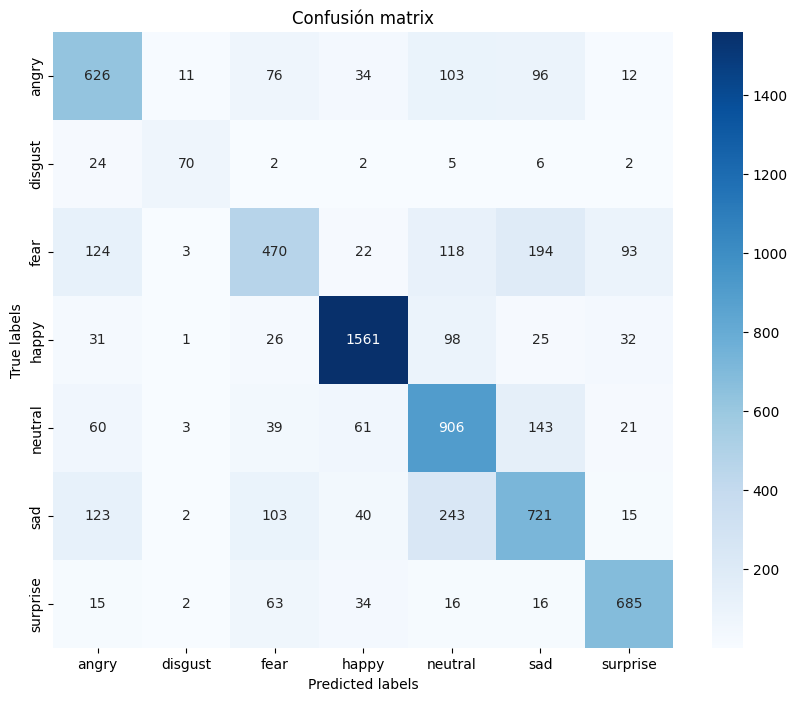

In [92]:
import seaborn as sns
confusion_classes  = test_generator.class_indices.keys()


plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

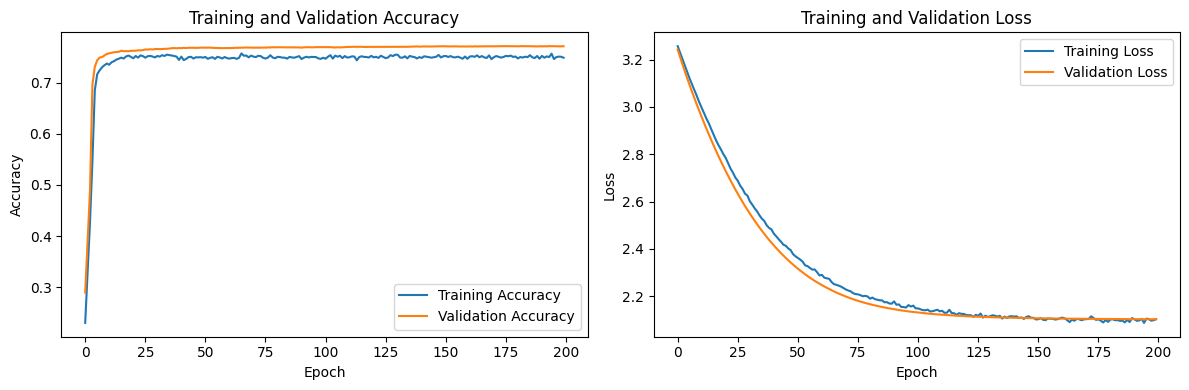

In [78]:
import matplotlib.pyplot as plt


accuracy = historyensemble_modelAdam005.history['accuracy']
loss = historyensemble_modelAdam005.history['loss']
val_accuracy = historyensemble_modelAdam005.history['val_accuracy']
val_loss = historyensemble_modelAdam005.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

model_moreDataEnsemble_load = tf.keras.models.load_model(r'models/ModelEnsamble/optimizacionModel13/model12_13_New_Adam/0.005/64batch/best_model_ModelPaper1_200_7020Test.h5')
model_moreDataEnsemble_load.evaluate(test_generator)

113/113 [==============================] - 43s 209ms/step - loss: 2.3265 - accuracy: 0.7020


[2.3265016078948975, 0.7020061016082764]

113/113 [==============================] - 10s 77ms/step


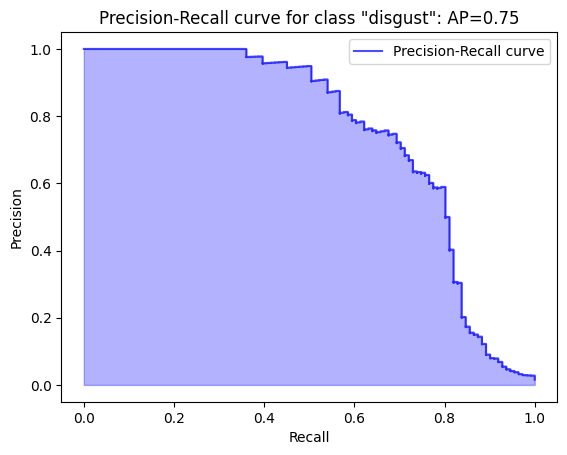

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = test_generator.classes
y_pred_prob = model_moreDataEnsemble_load.predict(test_generator)


class_index = 1

y_true_bin = (y_true == class_index).astype(int)

y_pred_prob_disgust = y_pred_prob[:, class_index]

precision, recall, thresholds = precision_recall_curve(y_true_bin, y_pred_prob_disgust)

average_precision = average_precision_score(y_true_bin, y_pred_prob_disgust)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for class "disgust": AP={average_precision:0.2f}')
plt.legend(loc='best')
plt.show()

113/113 [==============================] - 9s 78ms/step


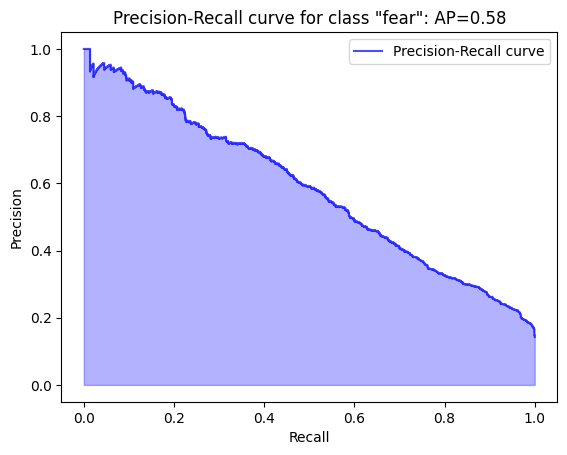

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = test_generator.classes
y_pred_prob = model_moreDataEnsemble_load.predict(test_generator)


class_index = 2

y_true_bin = (y_true == class_index).astype(int)

y_pred_prob_fear = y_pred_prob[:, class_index]

precision, recall, thresholds = precision_recall_curve(y_true_bin, y_pred_prob_fear)

average_precision = average_precision_score(y_true_bin, y_pred_prob_fear)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for class "fear": AP={average_precision:0.2f}')
plt.legend(loc='best')
plt.show()

113/113 [==============================] - 9s 76ms/step


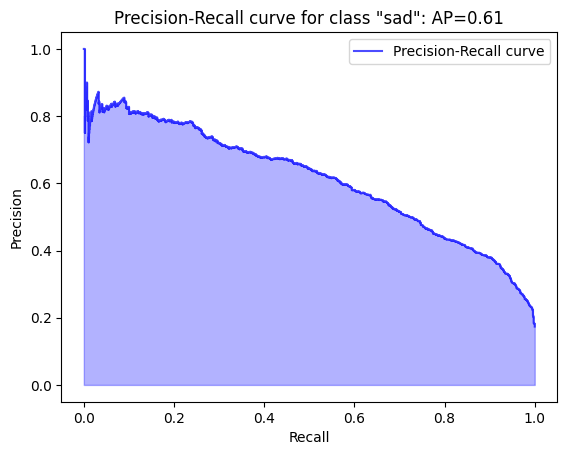

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = test_generator.classes
y_pred_prob = model_moreDataEnsemble_load.predict(test_generator)


class_index = 5

y_true_bin = (y_true == class_index).astype(int)

y_pred_prob_sad = y_pred_prob[:, class_index]

precision, recall, thresholds = precision_recall_curve(y_true_bin, y_pred_prob_sad)

average_precision = average_precision_score(y_true_bin, y_pred_prob_sad)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for class "sad": AP={average_precision:0.2f}')
plt.legend(loc='best')
plt.show()